# Library

In [52]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf


# Preprocessing

## Import data

In [27]:
url = "https://drive.google.com/file/d/1u95FUEFI29NV-LmdCRHzRwj-t4tWH87m/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2015-01-01 00:00:00+01:00                                 0.0   
2015-01-01 01:00:00+01:00                                 0.0   
2015-01-01 02:00:00+01:00                                 0.0   
2015-01-01 03:00:00+01:00                                 0.0   
2015-01-01 04:00:00+01:00                                 0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   

                           generation fossil oil  generation fossil oil shale  \
time                                                                            
2015-01-01 00:00:00+01:00                  162.0                          0.0   
2015-01-01 01:00:00+01:00                  158.0                          0.0   
2015-01-01 02:00:00+01:00                  157.0                          0.0   
2015-01-01 03:00:00+01:00                  160.0                          0.0   
2015-01-01 04:00:00+01:00                  156.0                          0.0   

                           generation fossil peat  generation geothermal  \
time                                                                       
2015-01-01 00:00:00+01:00                     0.0                    0.0   
2015-01-01 01:00:00+01:00                     0.0                    0.0   
2015-01-01 02:00:00+01:00                     0.0                    0.0   
2015-01-01 03:00:00+01:00                     0.0                    0.0   
2015-01-01 04:00:00+01:00                     0.0                    0.0   

                           generation hydro pumped storage aggregated  ...  \
time                                                                   ...   
2015-01-01 00:00:00+01:00                                         NaN  ...   
2015-01-01 01:00:00+01:00                                         NaN  ...   
2015-01-01 02:00:00+01:00                                         NaN  ...   
2015-01-01 03:00:00+01:00                                         NaN  ...   
2015-01-01 04:00:00+01:00                                         NaN  ...   

                           generation waste  generation wind offshore  \
time                                                                    
2015-01-01 00:00:00+01:00             196.0                       0.0   
2015-01-01 01:00:00+01:00             195.0                       0.0   
2015-01-01 02:00:00+01:00             196.0                       0.0   
2015-01-01 03:00:00+01:00             191.0                       0.0   
2015-01-01 04:00:00+01:00             189.0                       0.0   

                           ge

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

In [29]:
df.isnull().sum()

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [30]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

<AxesSubplot:xlabel='time'>

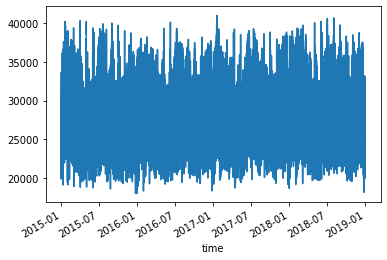

In [31]:
df['total load actual'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total load actual', ylabel='Density'>

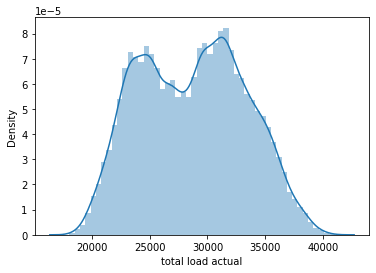

In [32]:
sns.distplot(df['total load actual'])

In [33]:
df.corr()['total load actual']

generation biomass                             0.083288
generation fossil brown coal/lignite           0.280461
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.548913
generation fossil hard coal                    0.396564
generation fossil oil                          0.497089
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage aggregated          NaN
generation hydro pumped storage consumption   -0.562809
generation hydro run-of-river and poundage     0.118570
generation hydro water reservoir               0.479481
generation marine                                   NaN
generation nuclear                             0.085664
generation other                               0.100690
generation other renewable                     0.181714
generation solar                               0

In [34]:
# memindah kolom target ke urutan pertama
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('total load actual')) #Remove b from list
df = df[['total load actual']+cols] #Create new dataframe with columns in the order you want

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   total load actual                            35028 non-null  float64
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal            

Feature Extraction

In [36]:
# Data 2

# All
# df_new = df.drop(df.columns[[10, 23, 25, 26]], axis=1)

# tanpa minus & nan
# df_new = df.drop(df.columns[[3, 7, 8, 9, 10, 11, 14, 20, 23, 25, 26]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1)

# Target
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total load actual  35028 non-null  float64
dtypes: float64(1)
memory usage: 547.9+ KB


In [38]:
values = df_new.values

In [39]:
values.shape

(35064, 1)

## Normalisasi

In [41]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [15]:
# Z-score
# scaled = stats.zscore(values, axis = 1)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [42]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [43]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

In [44]:
reframed.shape

(35005, 2)

In [45]:
# Data 2

# All
# reframed.drop(reframed.columns[[x for x in range(25, 48)]], axis=1, inplace=True)

# no minus dan NaN
# reframed.drop(reframed.columns[[x for x in range(18, 34)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)   var1(t)
1   0.319666  0.276008
2   0.276008  0.204274
3   0.204274  0.141247
4   0.141247  0.096762
5   0.096762  0.081135

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network SimpleRNN
model = Sequential()
model.add(SimpleRNN(93, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mae', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 1, 93)             8835      
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 1, 93)             17391     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 1, 93)             17391     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 93)             0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 1, 93)            

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/91
351/351 [==============================] - 9s 13ms/step - loss: 0.6061 - val_loss: 0.6049
Epoch 2/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5968 - val_loss: 0.6065
Epoch 3/91
351/351 [==============================] - 5s 14ms/step - loss: 0.5961 - val_loss: 0.6059
Epoch 4/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5944 - val_loss: 0.6050
Epoch 5/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5942 - val_loss: 0.6103
Epoch 6/91
351/351 [==============================] - 5s 13ms/step - loss: 0.5948 - val_loss: 0.6106
Epoch 7/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5956 - val_loss: 0.6083
Epoch 8/91
351/351 [==============================] - 4s 12ms/step - loss: 0.5938 - val_loss: 0.6114
Epoch 9/91
351/351 [==============================] - 5s 13ms/step - loss: 0.5941 - val_loss: 0.6098
Epoch 10/91
351/351 [==============================] - 4s 11ms/step - loss: 0.5940 - val_lo

### Grid Search

In [ ]:
#design network SimpleRNN
model = Sequential()
model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 1, 32)             1088      
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)             

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
351/351 [==============================] - 4s 5ms/step - loss: 0.6286 - val_loss: 0.5898
Epoch 2/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5912 - val_loss: 0.5893
Epoch 3/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5904 - val_loss: 0.5887
Epoch 4/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5900 - val_loss: 0.5885
Epoch 5/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5894 - val_loss: 0.5883
Epoch 6/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5892 - val_loss: 0.5882
Epoch 7/50
351/351 [==============================] - 2s 5ms/step - loss: 0.5891 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5889 - val_loss: 0.5882
Epoch 9/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5888 - val_loss: 0.5880
Epoch 10/50
351/351 [==============================] - 1s 4ms/step - loss: 0.5886 - val_loss: 0.5880

# Evaluasi

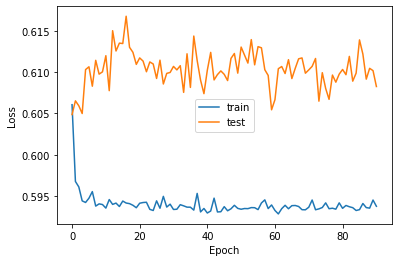

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(test_y, yhat))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(yhat, test_y))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

==============minmax===================
MAPE test is : 62521.469337739785
MAPE test invert is : 0.972611836188902
==============zscore===================
MAPE test is : 1.1113186721651493
MAPE test invert is : 1.0364166248624451
RMSE Testing is : 0.774
RMSE Testing invert is : 3539.446
R2 test is : 0.40117207566495783
R2 test invert is : 0.40117207566495794


Actual : [[-0.94317221]
 [-1.30339688]
 [-1.61990496]
 ...
 [-0.13681978]
 [-0.63300303]
 [-0.92721566]]
Predicted: [[6.6723360e-06]
 [4.2752645e-06]
 [2.7290664e-06]
 ...
 [6.6953809e-03]
 [1.0485367e-04]
 [8.5251486e-06]]


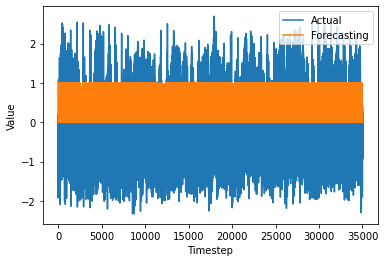

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

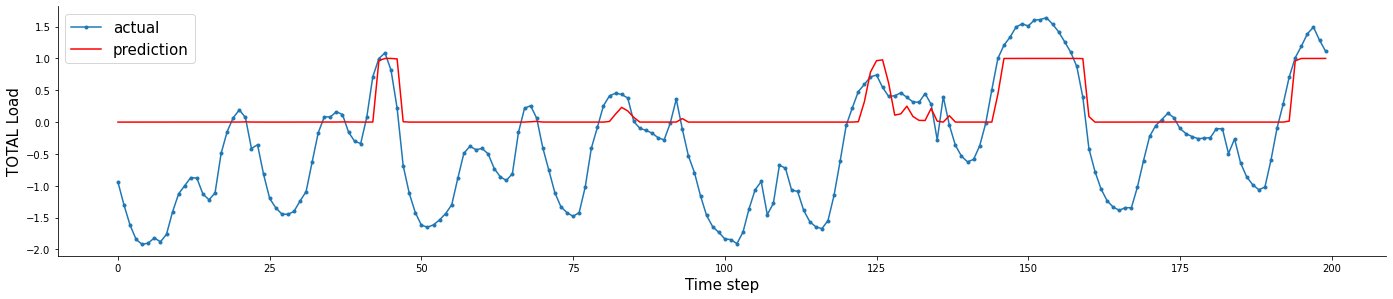

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

Epoch 1/50
351/351 [==============================] - 21s 27ms/step - loss: 0.6296 - val_loss: 0.5894
Epoch 2/50
351/351 [==============================] - 6s 17ms/step - loss: 0.5908 - val_loss: 0.5890
Epoch 3/50
351/351 [==============================] - 6s 18ms/step - loss: 0.5902 - val_loss: 0.5886
Epoch 4/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5896 - val_loss: 0.5883
Epoch 5/50
351/351 [==============================] - 7s 19ms/step - loss: 0.5894 - val_loss: 0.5882
Epoch 6/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5890 - val_loss: 0.5881
Epoch 7/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5888 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 5s 14ms/step - loss: 0.5888 - val_loss: 0.5881
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5887 - val_loss: 0.5878
Epoch 10/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5886 - val_l

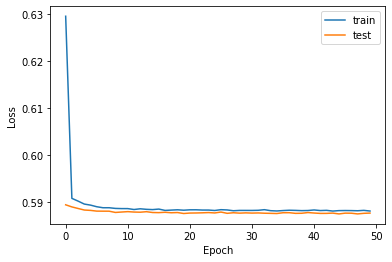

==============minmax===================
MAPE test is : 2.04600223804862
MAPE test invert is : 0.1066551469439559
==============zscore===================
MAPE test is : 58889.69756247402
MAPE test invert is : 0.09161102386187618
RMSE Testing is : 0.767
RMSE Testing invert is : 3507.098
R2 test is : 0.4120676744329146
R2 test invert is : 0.4120676744329147


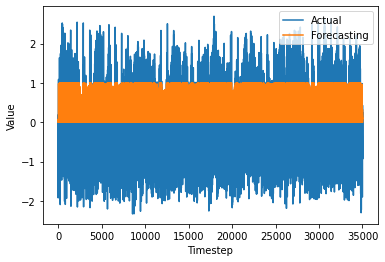

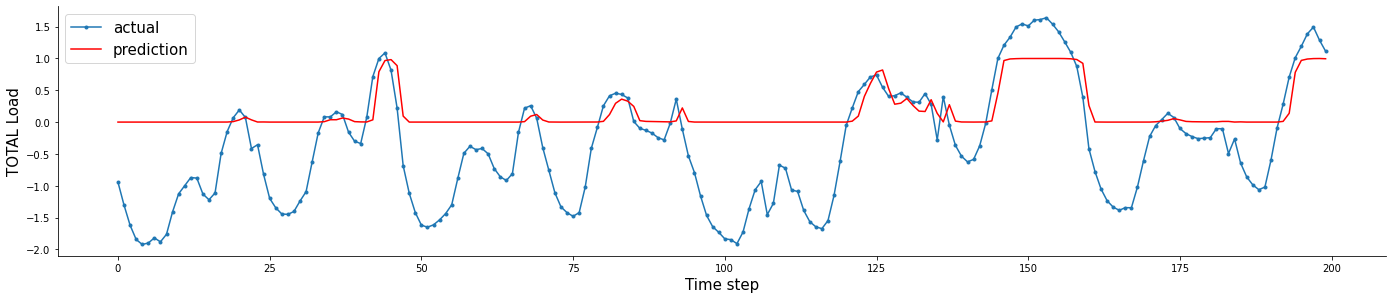

Epoch 1/50
351/351 [==============================] - 5s 7ms/step - loss: 0.6224 - val_loss: 0.5898
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5909 - val_loss: 0.5890
Epoch 3/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5901 - val_loss: 0.5887
Epoch 4/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5895 - val_loss: 0.5883
Epoch 5/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5893 - val_loss: 0.5882
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5892 - val_loss: 0.5882
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5888 - val_loss: 0.5880
Epoch 8/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5889 - val_loss: 0.5880
Epoch 9/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5886 - val_loss: 0.5879
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5885 - val_loss: 0.588

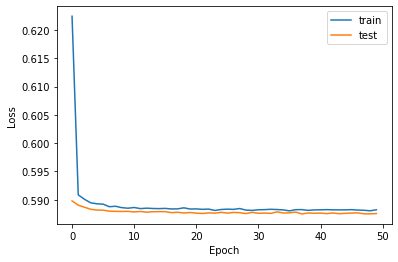

==============minmax===================
MAPE test is : 2.106107146480452
MAPE test invert is : 0.10661063864845767
==============zscore===================
MAPE test is : 48550.2418730102
MAPE test invert is : 0.09153832903728874
RMSE Testing is : 0.767
RMSE Testing invert is : 3506.810
R2 test is : 0.4121642856563752
R2 test invert is : 0.4121642856563751


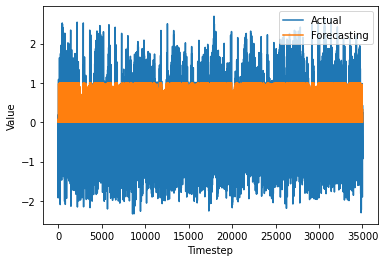

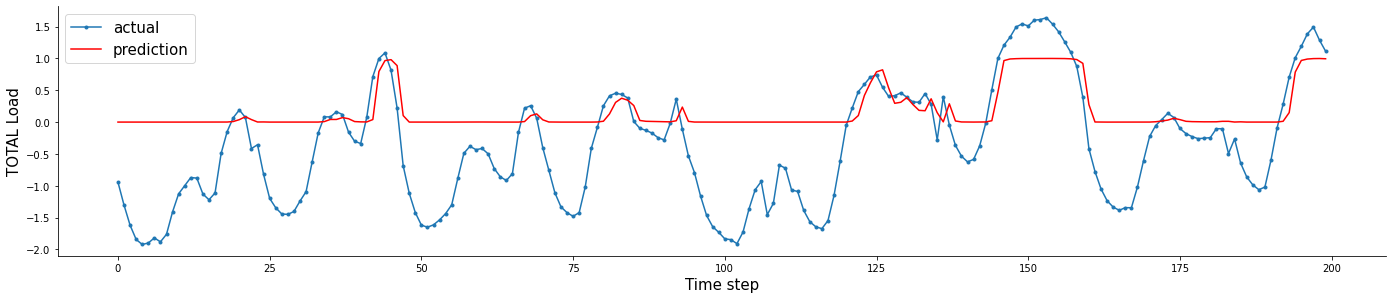

Epoch 1/50
351/351 [==============================] - 7s 10ms/step - loss: 0.6283 - val_loss: 0.5899
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5909 - val_loss: 0.5892
Epoch 3/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5904 - val_loss: 0.5888
Epoch 4/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5898 - val_loss: 0.5885
Epoch 5/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5896 - val_loss: 0.5884
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5892 - val_loss: 0.5882
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5888 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5888 - val_loss: 0.5880
Epoch 9/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5888 - val_loss: 0.5880
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5886 - val_loss: 0.588

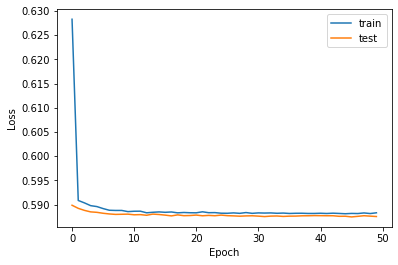

==============minmax===================
MAPE test is : 2.1020726781562855
MAPE test invert is : 0.10660750931134927
==============zscore===================
MAPE test is : 46101.01615609286
MAPE test invert is : 0.09153833083110696
RMSE Testing is : 0.767
RMSE Testing invert is : 3506.766
R2 test is : 0.4121789395590634
R2 test invert is : 0.4121789395590635


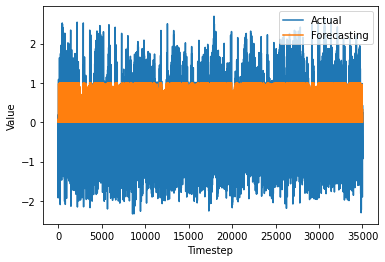

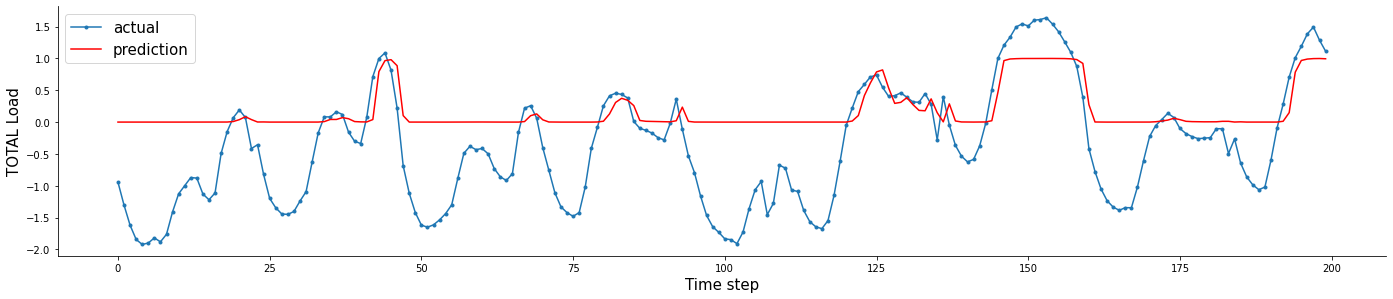

Epoch 1/50
351/351 [==============================] - 5s 8ms/step - loss: 0.6465 - val_loss: 0.5903
Epoch 2/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5919 - val_loss: 0.5895
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5906 - val_loss: 0.5890
Epoch 4/50
351/351 [==============================] - 3s 7ms/step - loss: 0.5902 - val_loss: 0.5887
Epoch 5/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5897 - val_loss: 0.5885
Epoch 6/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5894 - val_loss: 0.5884
Epoch 7/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5892 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5890 - val_loss: 0.5881
Epoch 9/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5889 - val_loss: 0.5881
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.5889 - val_loss: 0.5879

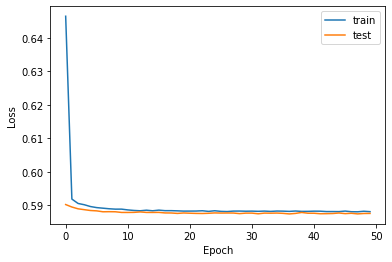

==============minmax===================
MAPE test is : 2.0813847973482518
MAPE test invert is : 0.1066344727229013
==============zscore===================
MAPE test is : 52813.28249680708
MAPE test invert is : 0.09157254371934166
RMSE Testing is : 0.767
RMSE Testing invert is : 3506.985
R2 test is : 0.41210550987076067
R2 test invert is : 0.41210550987076067


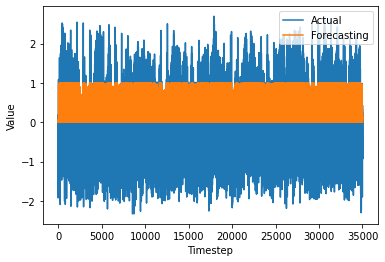

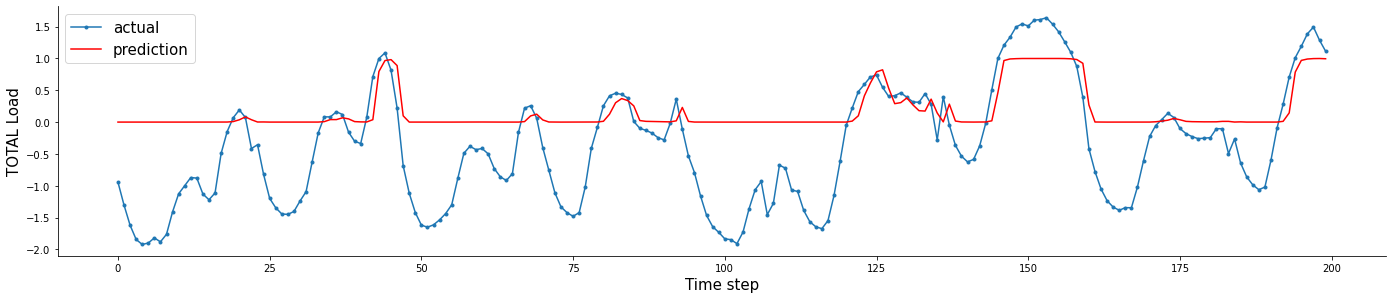

Epoch 1/50
351/351 [==============================] - 7s 11ms/step - loss: 0.6377 - val_loss: 0.5895
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5908 - val_loss: 0.5892
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5903 - val_loss: 0.5887
Epoch 4/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5899 - val_loss: 0.5886
Epoch 5/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5895 - val_loss: 0.5885
Epoch 6/50
351/351 [==============================] - 4s 10ms/step - loss: 0.5893 - val_loss: 0.5882
Epoch 7/50
351/351 [==============================] - 4s 11ms/step - loss: 0.5891 - val_loss: 0.5881
Epoch 8/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5889 - val_loss: 0.5881
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5889 - val_loss: 0.5880
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5889 - val_loss:

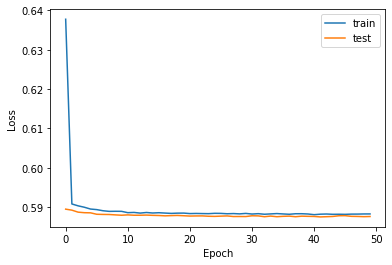

==============minmax===================
MAPE test is : 2.0817798053005894
MAPE test invert is : 0.10662474656080975
==============zscore===================
MAPE test is : 51149.74224948127
MAPE test invert is : 0.09156426178370475
RMSE Testing is : 0.767
RMSE Testing invert is : 3506.881
R2 test is : 0.4121406201477654
R2 test invert is : 0.4121406201477654


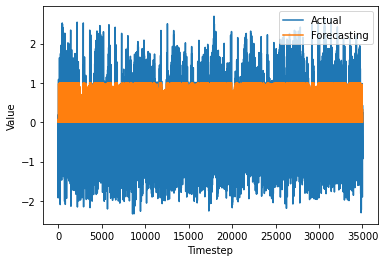

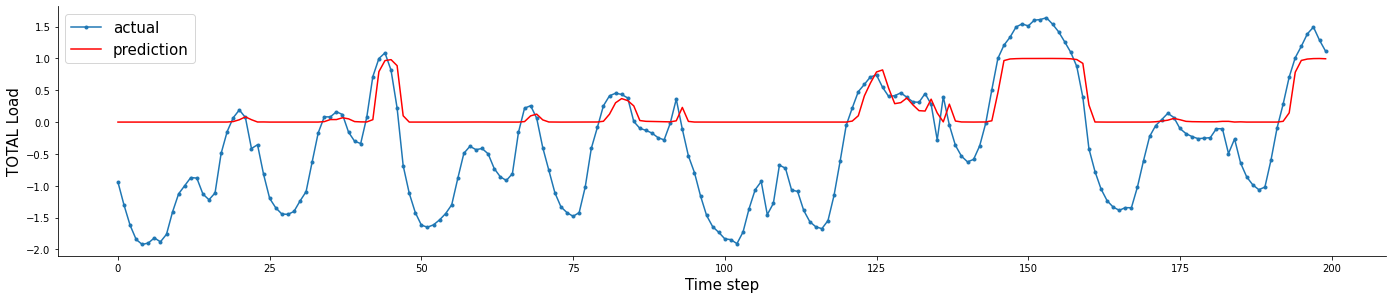

In [20]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')



  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

## tanh minmax

Epoch 1/50
351/351 [==============================] - 18s 24ms/step - loss: 0.0129 - val_loss: 0.0040
Epoch 2/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 3/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 4/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 8/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 9/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 10/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0047 - val_lo

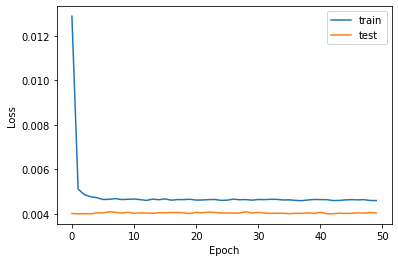

==============minmax===================
MAPE test is : 14900934215.53863
MAPE test invert is : 0.03932
==============zscore===================
MAPE test is : 0.12950
MAPE test invert is : 0.03979
RMSE Testing is : 0.064
RMSE Testing invert is : 1459.241
R2 test is : 0.89821


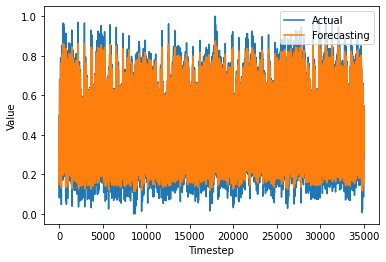

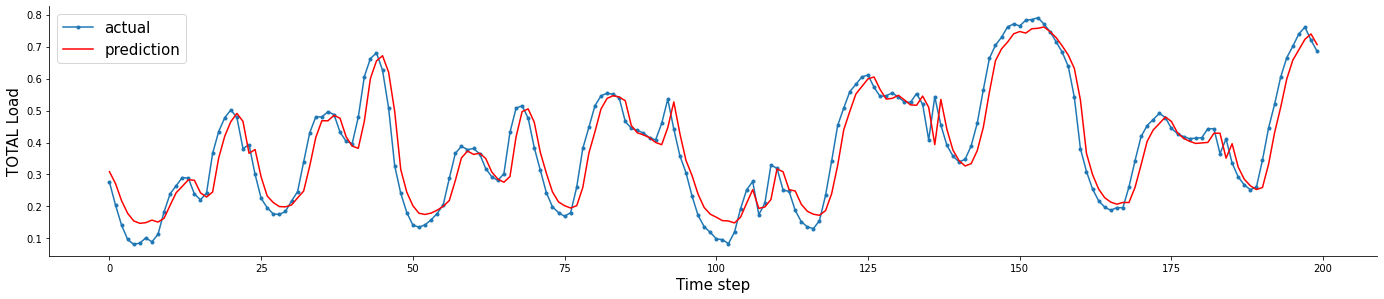

Epoch 1/50
351/351 [==============================] - 12s 18ms/step - loss: 0.0123 - val_loss: 0.0040
Epoch 2/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 3/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 7/50
351/351 [==============================] - 5s 13ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 8/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_l

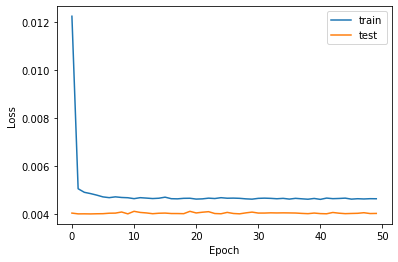

==============minmax===================
MAPE test is : 14749670395.14398
MAPE test invert is : 0.03918
==============zscore===================
MAPE test is : 0.12860
MAPE test invert is : 0.03953
RMSE Testing is : 0.063
RMSE Testing invert is : 1454.785
R2 test is : 0.89884


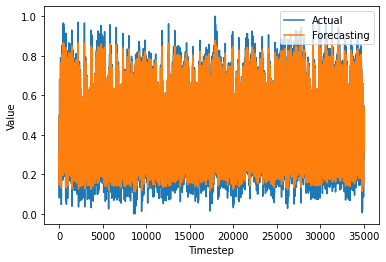

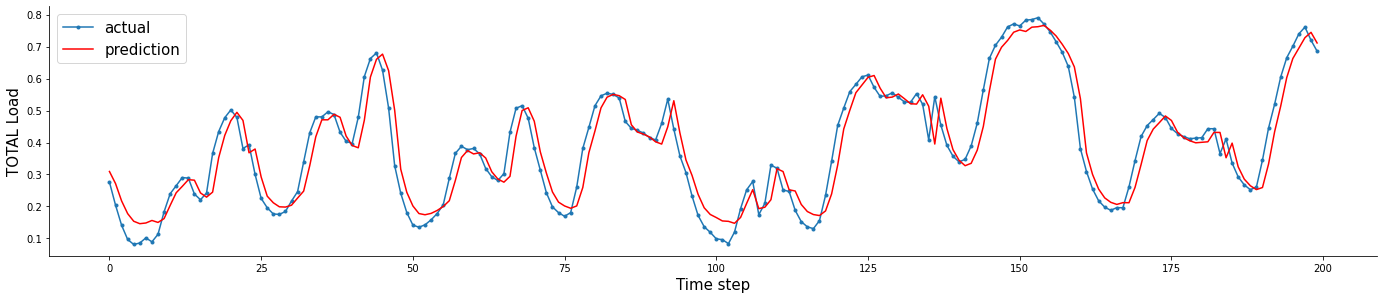

Epoch 1/50
351/351 [==============================] - 9s 12ms/step - loss: 0.0116 - val_loss: 0.0040
Epoch 2/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 3/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 4/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 6/50
351/351 [==============================] - 4s 13ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 7/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 8/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 9/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 10/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0047 - val_lo

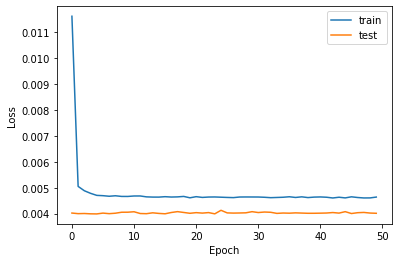

==============minmax===================
MAPE test is : 15186558589.54186
MAPE test invert is : 0.03953
==============zscore===================
MAPE test is : 0.12915
MAPE test invert is : 0.03983
RMSE Testing is : 0.063
RMSE Testing invert is : 1455.541
R2 test is : 0.89873


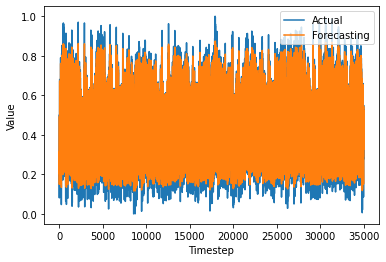

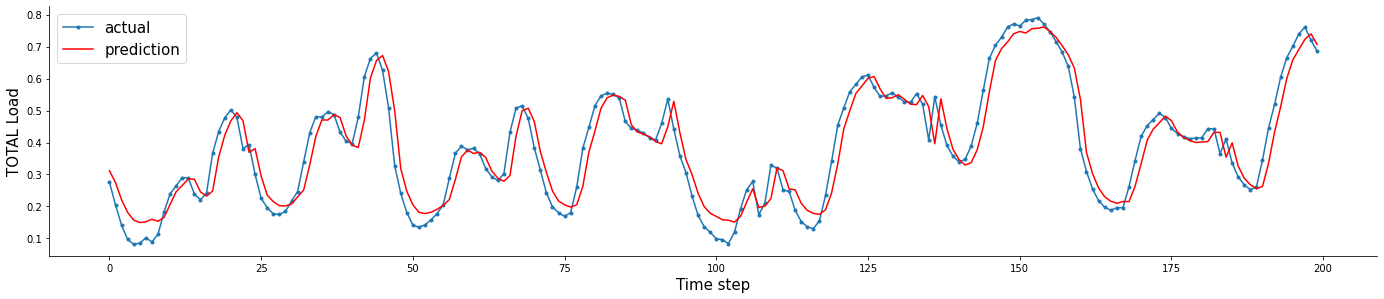

Epoch 1/50
351/351 [==============================] - 12s 15ms/step - loss: 0.0118 - val_loss: 0.0040
Epoch 2/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 3/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 4/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
351/351 [==============================] - 6s 17ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 7/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 8/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 10/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0046 - val_l

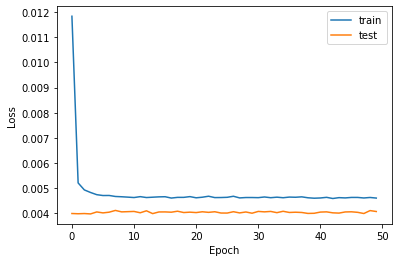

==============minmax===================
MAPE test is : 14798657661.17312
MAPE test invert is : 0.03940
==============zscore===================
MAPE test is : 0.13055
MAPE test invert is : 0.04004
RMSE Testing is : 0.064
RMSE Testing invert is : 1467.111
R2 test is : 0.89711


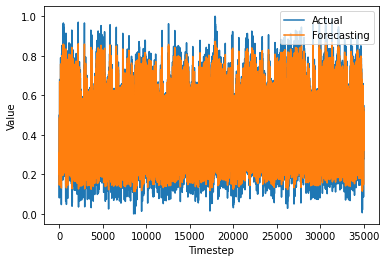

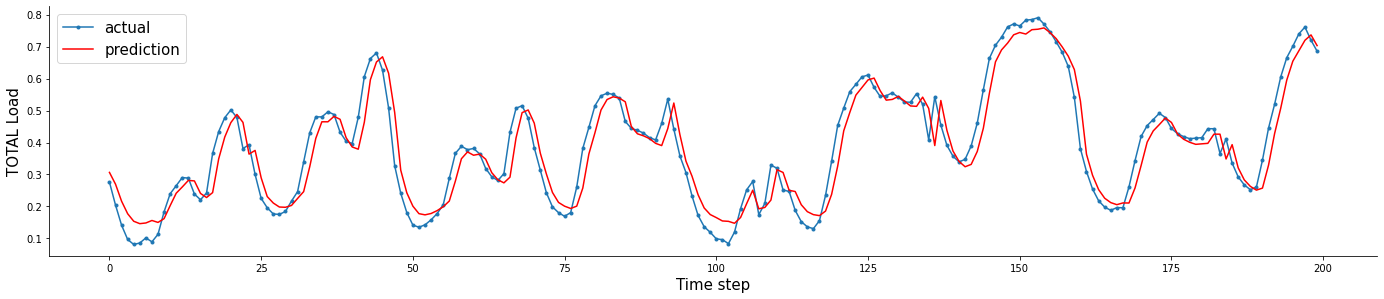

Epoch 1/50
351/351 [==============================] - 11s 14ms/step - loss: 0.0129 - val_loss: 0.0040
Epoch 2/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 3/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 4/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 5/50
351/351 [==============================] - 5s 16ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 7/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 8/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 10/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0046 - val_lo

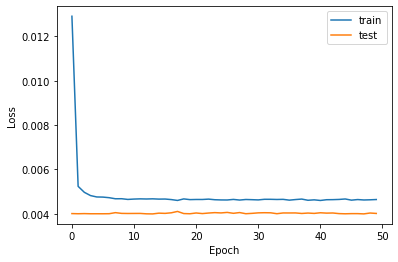

==============minmax===================
MAPE test is : 15056456922.98937
MAPE test invert is : 0.03939
==============zscore===================
MAPE test is : 0.12902
MAPE test invert is : 0.03973
RMSE Testing is : 0.063
RMSE Testing invert is : 1455.643
R2 test is : 0.89872


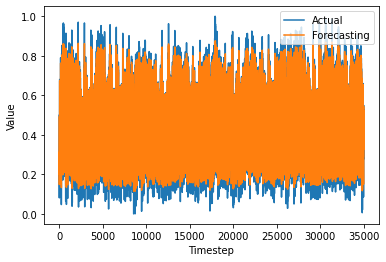

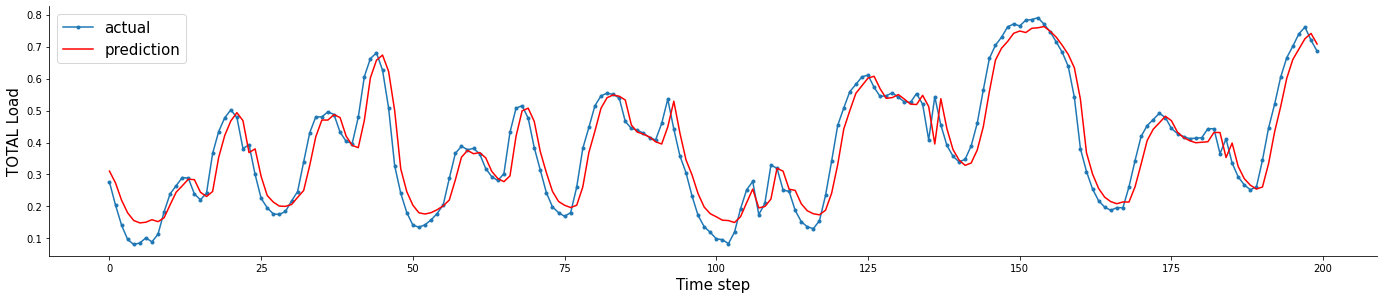

0                    1                    2  \
0   14900934215,538626   14749670395,143982   15186558589,541857   
1   0,0393234953871324  0,03918049957262769  0,03952537223287959   
2  0,12950017755664076  0,12860196985518446  0,12915316611295924   
3  0,03979387772752363  0,03953178831113453  0,03983479156706454   
4   0.0635170413644319   0.0633231107723996  0.06335599517196751   
5   1459,2405083064584   1454,7851468851084   1455,5406330807816   
6   0,8982146531631986   0,8988352475135872   0,8987301482564737   
7                  212                  205                  208   

                      3                    4  
0    14798657661,173122   15056456922,989372  
1  0,039400340983459375  0,03938888948295513  
2    0,1305452097629989  0,12902126610490408  
3   0,04003825204584753  0,03973159807522016  
4   0.06385960949657793  0.06336045126972063  
5    1467,1106685743814   1455,6430074705618  
6    0,8971137692502117   0,8987159022730461  
7                   269                  268

In [47]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))
  waktu = end-start

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))

  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")



datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
datat.append(['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu'])
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)
  
# print dataframe.
dc

## sig minmax

mkdir: cannot create directory ‘foto3’: File exists
Epoch 1/50
351/351 [==============================] - 12s 20ms/step - loss: 0.0450 - val_loss: 0.0393
Epoch 2/50
351/351 [==============================] - 4s 13ms/step - loss: 0.0417 - val_loss: 0.0385
Epoch 3/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0390 - val_loss: 0.0342
Epoch 4/50
351/351 [==============================] - 6s 18ms/step - loss: 0.0306 - val_loss: 0.0150
Epoch 5/50
351/351 [==============================] - 4s 13ms/step - loss: 0.0186 - val_loss: 0.0066
Epoch 6/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0146 - val_loss: 0.0055
Epoch 7/50
351/351 [==============================] - 7s 19ms/step - loss: 0.0126 - val_loss: 0.0051
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0113 - val_loss: 0.0049
Epoch 9/50
351/351 [==============================] - 6s 16ms/step - loss: 0.0105 - val_loss: 0.0047
Epoch 10/50
351/351 [=================

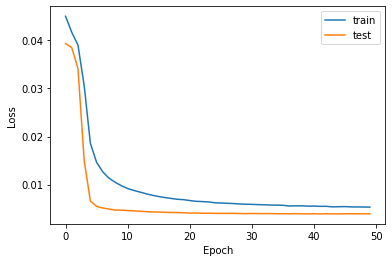

==============minmax===================
MAPE test is : 12090674569.56555
MAPE test invert is : 0.03959
==============zscore===================
MAPE test is : 0.12588
MAPE test invert is : 0.03965
RMSE Testing is : 0.063
RMSE Testing invert is : 1439.259
R2 test is : 0.90098


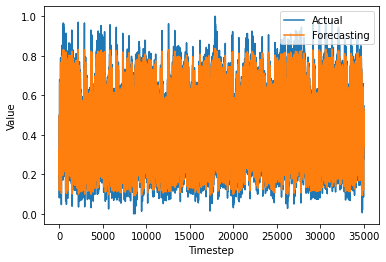

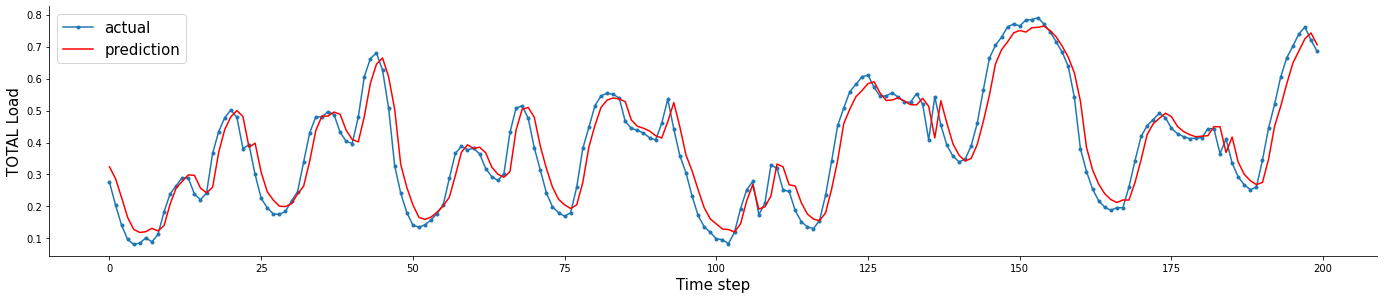

Epoch 1/50
351/351 [==============================] - 10s 13ms/step - loss: 0.0483 - val_loss: 0.0394
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0431 - val_loss: 0.0389
Epoch 3/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0405 - val_loss: 0.0369
Epoch 4/50
351/351 [==============================] - 5s 15ms/step - loss: 0.0360 - val_loss: 0.0261
Epoch 5/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0239 - val_loss: 0.0087
Epoch 6/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0165 - val_loss: 0.0060
Epoch 7/50
351/351 [==============================] - 5s 14ms/step - loss: 0.0137 - val_loss: 0.0053
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0122 - val_loss: 0.0051
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.0111 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss

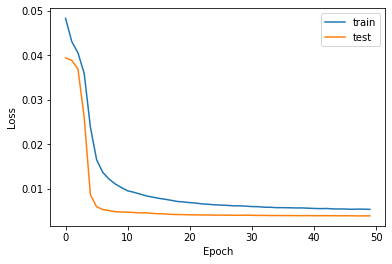

==============minmax===================
MAPE test is : 13180908437.63758
MAPE test invert is : 0.03995
==============zscore===================
MAPE test is : 0.12658
MAPE test invert is : 0.03983
RMSE Testing is : 0.063
RMSE Testing invert is : 1438.305
R2 test is : 0.90111


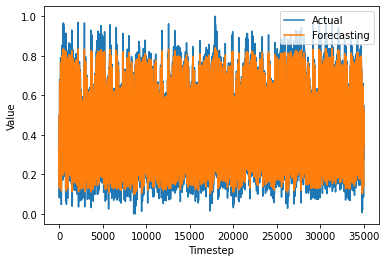

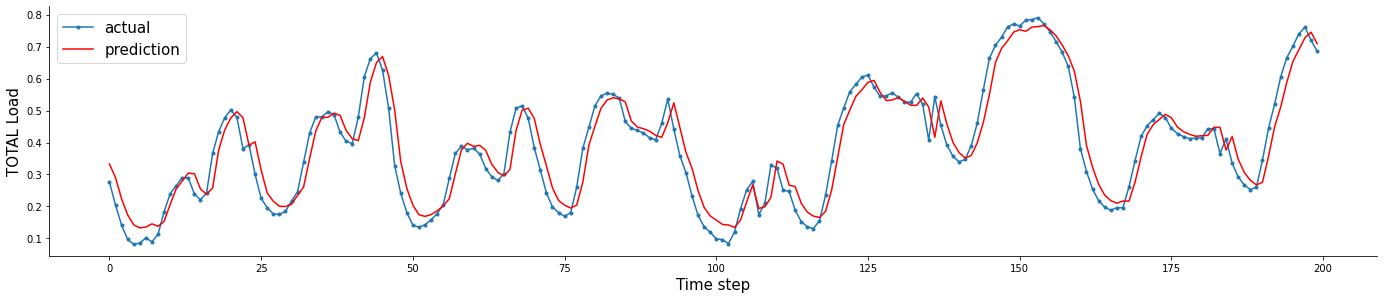

Epoch 1/50
351/351 [==============================] - 10s 12ms/step - loss: 0.0468 - val_loss: 0.0394
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0426 - val_loss: 0.0387
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0401 - val_loss: 0.0359
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0341 - val_loss: 0.0216
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0221 - val_loss: 0.0080
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.0161 - val_loss: 0.0059
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.0140 - val_loss: 0.0052
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0124 - val_loss: 0.0051
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0115 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0107 - val_loss: 0.00

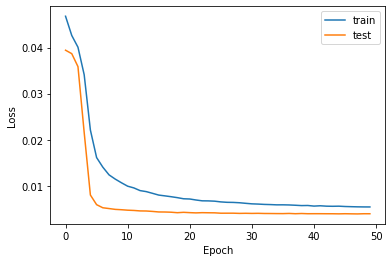

==============minmax===================
MAPE test is : 11818614793.96880
MAPE test invert is : 0.03935
==============zscore===================
MAPE test is : 0.12568
MAPE test invert is : 0.03955
RMSE Testing is : 0.063
RMSE Testing invert is : 1440.379
R2 test is : 0.90083


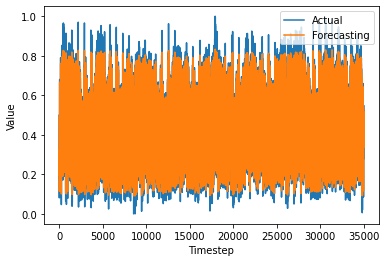

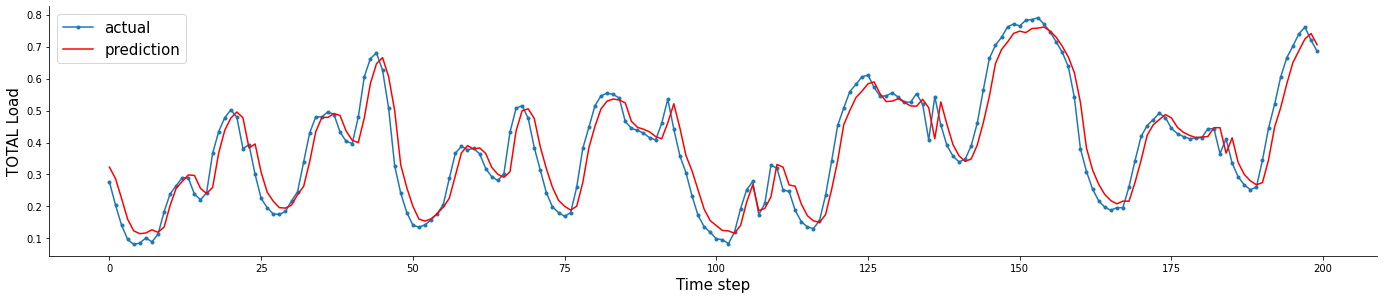

Epoch 1/50
351/351 [==============================] - 7s 9ms/step - loss: 0.0454 - val_loss: 0.0395
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0418 - val_loss: 0.0390
Epoch 3/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0399 - val_loss: 0.0370
Epoch 4/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0341 - val_loss: 0.0208
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0200 - val_loss: 0.0067
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0148 - val_loss: 0.0055
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0126 - val_loss: 0.0051
Epoch 8/50
351/351 [==============================] - 4s 12ms/step - loss: 0.0114 - val_loss: 0.0049
Epoch 9/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 2s 6ms/step - loss: 0.0098 - val_loss: 0.00

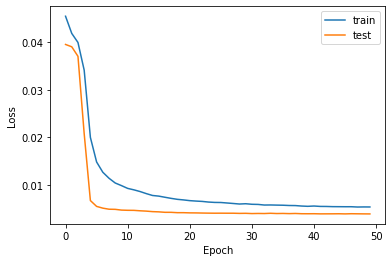

==============minmax===================
MAPE test is : 12122332009.11133
MAPE test invert is : 0.03964
==============zscore===================
MAPE test is : 0.12556
MAPE test invert is : 0.03953
RMSE Testing is : 0.062
RMSE Testing invert is : 1433.134
R2 test is : 0.90182


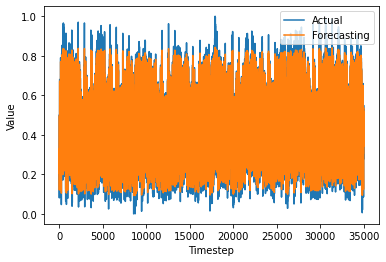

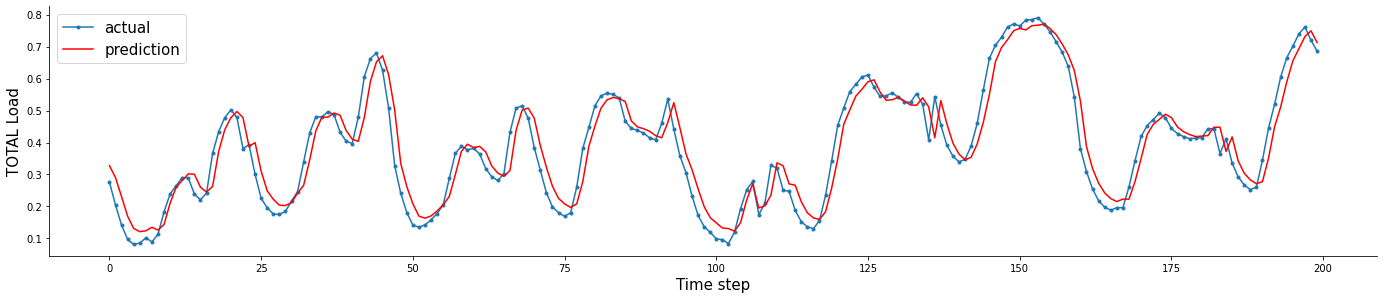

Epoch 1/50
351/351 [==============================] - 6s 8ms/step - loss: 0.0472 - val_loss: 0.0394
Epoch 2/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0420 - val_loss: 0.0390
Epoch 3/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0402 - val_loss: 0.0376
Epoch 4/50
351/351 [==============================] - 4s 10ms/step - loss: 0.0373 - val_loss: 0.0307
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0269 - val_loss: 0.0110
Epoch 6/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0173 - val_loss: 0.0062
Epoch 7/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0140 - val_loss: 0.0055
Epoch 8/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0123 - val_loss: 0.0052
Epoch 9/50
351/351 [==============================] - 4s 11ms/step - loss: 0.0113 - val_loss: 0.0049
Epoch 10/50
351/351 [==============================] - 2s 7ms/step - loss: 0.0105 - val_loss: 0.00

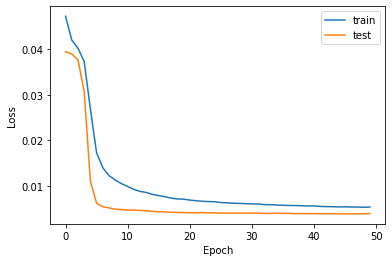

==============minmax===================
MAPE test is : 14255883929.80379
MAPE test invert is : 0.04081
==============zscore===================
MAPE test is : 0.12818
MAPE test invert is : 0.04059
RMSE Testing is : 0.063
RMSE Testing invert is : 1452.279
R2 test is : 0.89918


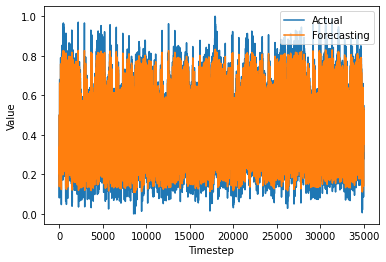

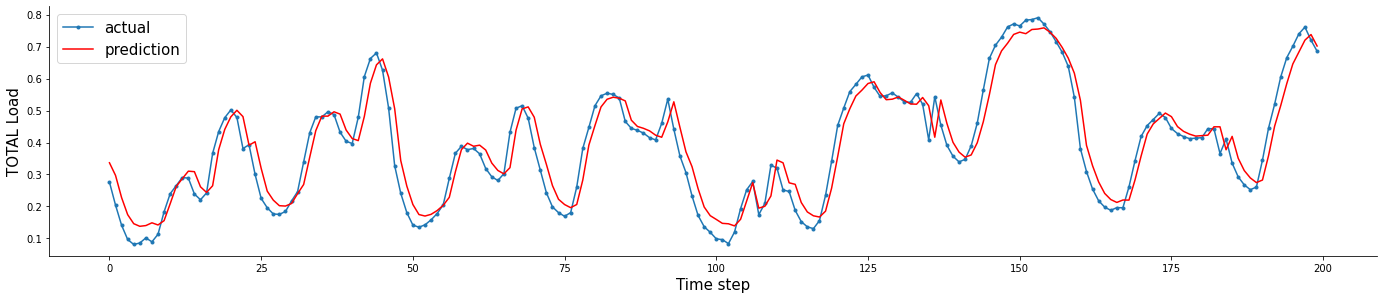

0                     1                    2  \
0    12090674569,565554    13180908437,637583   11818614793,968796   
1   0,03958558444157278  0,039946444253547965  0,03935226848178732   
2    0,1258775843041518     0,126583748927362  0,12568144877247564   
3  0,039647405925424865   0,03983148164342848  0,03955364175088974   
4   0.06264730143489027   0.06260576653247632  0.06269603737898764   
5    1439,2591031651689    1438,3048803171107    1440,378762744862   
6    0,9009830655181045      0,90111431763205   0,9008289468019524   
7                   268                   268                  268   
8               mminmax         minmax invert               zscore   

                      3                     4             5     6      7  
0    12122332009,111334    14255883929,803795          None  None   None  
1   0,03963928566126198   0,04080932600644879          None  None   None  
2   0,12556205194127448   0,12817982739272085          None  None   None  
3  0,039531849968786864  0,040590230671102456          None  None   None  
4  0.062380703617461314   0.06321403476763263          None  None   None  
5     1433,134284907556    1452,2792347515917          None  None   None  
6    0,9018240125292536    0,8991834661380557          None  None   None  
7                   268                   268          None  None   None  
8         zscpre invert                  rmse   rmse invert    r2  waktu

In [49]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []


for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
datat.append(['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu'])
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)
  
# print dataframe.
dc

## sig zscore

Epoch 1/50
351/351 [==============================] - 8s 11ms/step - loss: 1.0252 - val_loss: 0.9902
Epoch 2/50
351/351 [==============================] - 3s 10ms/step - loss: 0.8465 - val_loss: 0.6167
Epoch 3/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6240 - val_loss: 0.5955
Epoch 4/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6109 - val_loss: 0.5944
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6063 - val_loss: 0.5940
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6040 - val_loss: 0.5922
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6016 - val_loss: 0.5911
Epoch 8/50
351/351 [==============================] - 5s 13ms/step - loss: 0.5997 - val_loss: 0.5904
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5983 - val_loss: 0.5895
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5972 - val_loss: 

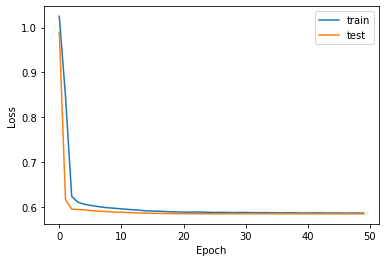

==============minmax===================
MAPE test is : 2.187389058053528
MAPE test invert is : 0.1058872754789556
==============zscore===================
MAPE test is : 30128.253618063576
MAPE test invert is : 0.09086926858296149
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.343
R2 test is : 0.4149995735230382
R2 test invert is : 0.4149995735230383


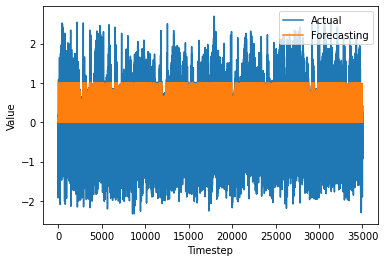

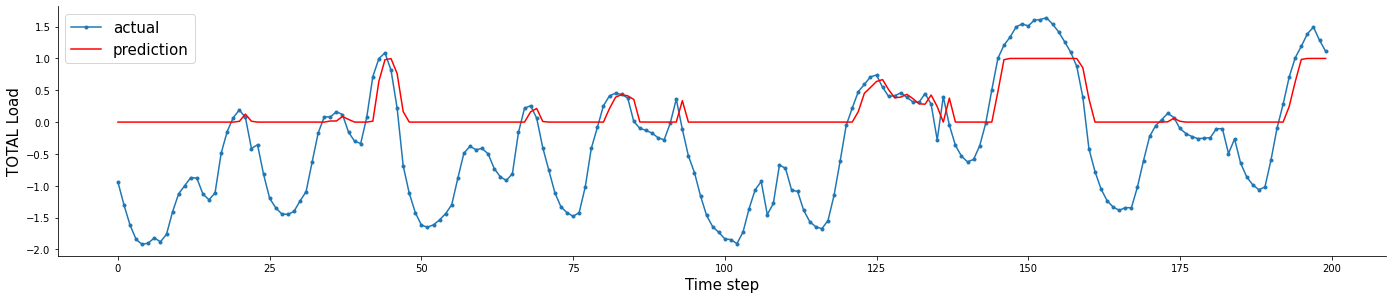

Epoch 1/50
351/351 [==============================] - 6s 9ms/step - loss: 1.0670 - val_loss: 0.9913
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8645 - val_loss: 0.6390
Epoch 3/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6358 - val_loss: 0.5992
Epoch 4/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6148 - val_loss: 0.5960
Epoch 5/50
351/351 [==============================] - 2s 7ms/step - loss: 0.6087 - val_loss: 0.5942
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6054 - val_loss: 0.5933
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6035 - val_loss: 0.5913
Epoch 8/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6016 - val_loss: 0.5903
Epoch 9/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5992 - val_loss: 0.5896
Epoch 10/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5976 - val_loss: 0.588

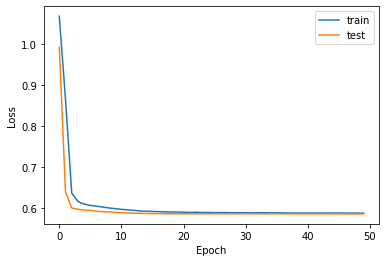

==============minmax===================
MAPE test is : 2.213420796434258
MAPE test invert is : 0.10587392320214649
==============zscore===================
MAPE test is : 99621.69882438456
MAPE test invert is : 0.09081516967565105
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.385
R2 test is : 0.41498529706081855
R2 test invert is : 0.41498529706081855


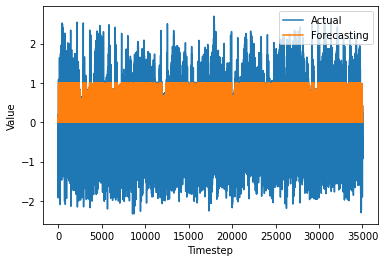

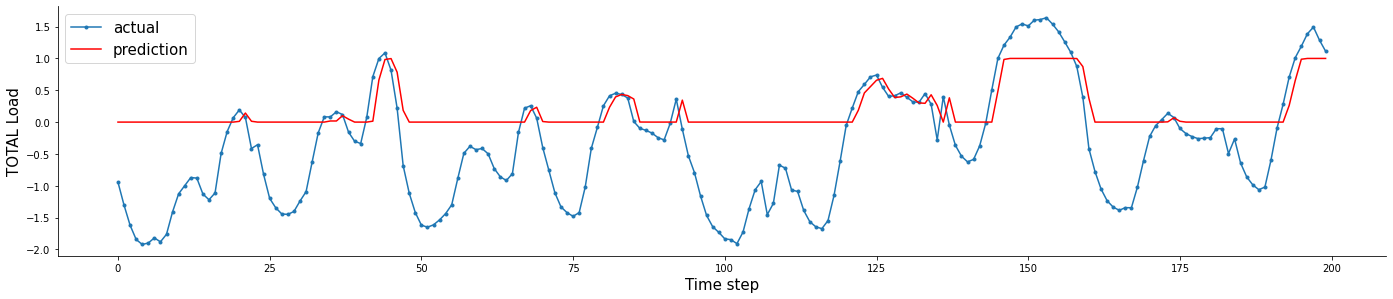

Epoch 1/50
351/351 [==============================] - 9s 11ms/step - loss: 1.0184 - val_loss: 0.9896
Epoch 2/50
351/351 [==============================] - 4s 10ms/step - loss: 0.8460 - val_loss: 0.6169
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6244 - val_loss: 0.5966
Epoch 4/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6124 - val_loss: 0.5949
Epoch 5/50
351/351 [==============================] - 4s 10ms/step - loss: 0.6069 - val_loss: 0.5936
Epoch 6/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6042 - val_loss: 0.5923
Epoch 7/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6020 - val_loss: 0.5911
Epoch 8/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6004 - val_loss: 0.5903
Epoch 9/50
351/351 [==============================] - 3s 9ms/step - loss: 0.5983 - val_loss: 0.5894
Epoch 10/50
351/351 [==============================] - 4s 12ms/step - loss: 0.5971 - val_loss:

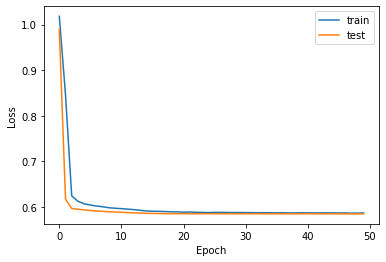

==============minmax===================
MAPE test is : 2.2078915632546052
MAPE test invert is : 0.10587844075212029
==============zscore===================
MAPE test is : 66098.96124504032
MAPE test invert is : 0.09084954050068866
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.244
R2 test is : 0.41503246217258816
R2 test invert is : 0.41503246217258816


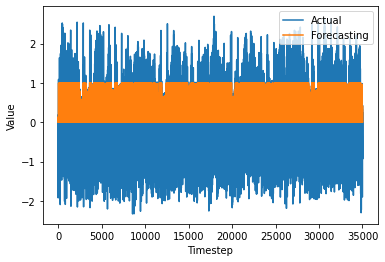

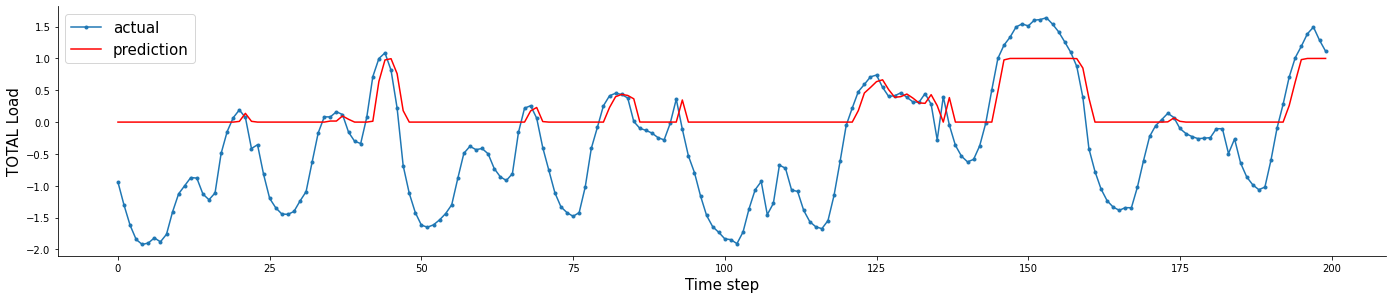

Epoch 1/50
351/351 [==============================] - 7s 11ms/step - loss: 1.0085 - val_loss: 0.9903
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8226 - val_loss: 0.6083
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6208 - val_loss: 0.5957
Epoch 4/50
351/351 [==============================] - 3s 7ms/step - loss: 0.6106 - val_loss: 0.5943
Epoch 5/50
351/351 [==============================] - 3s 7ms/step - loss: 0.6059 - val_loss: 0.5940
Epoch 6/50
351/351 [==============================] - 3s 8ms/step - loss: 0.6034 - val_loss: 0.5914
Epoch 7/50
351/351 [==============================] - 4s 12ms/step - loss: 0.6006 - val_loss: 0.5906
Epoch 8/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5989 - val_loss: 0.5898
Epoch 9/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5971 - val_loss: 0.5889
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5955 - val_loss: 0.58

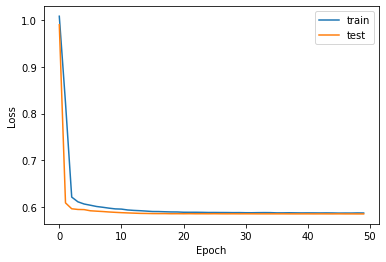

==============minmax===================
MAPE test is : 2.2078286992491565
MAPE test invert is : 0.1058669851619407
==============zscore===================
MAPE test is : 42930.91015700997
MAPE test invert is : 0.09082644407122453
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.278
R2 test is : 0.41502105326669914
R2 test invert is : 0.41502105326669914


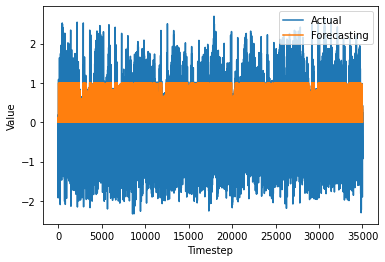

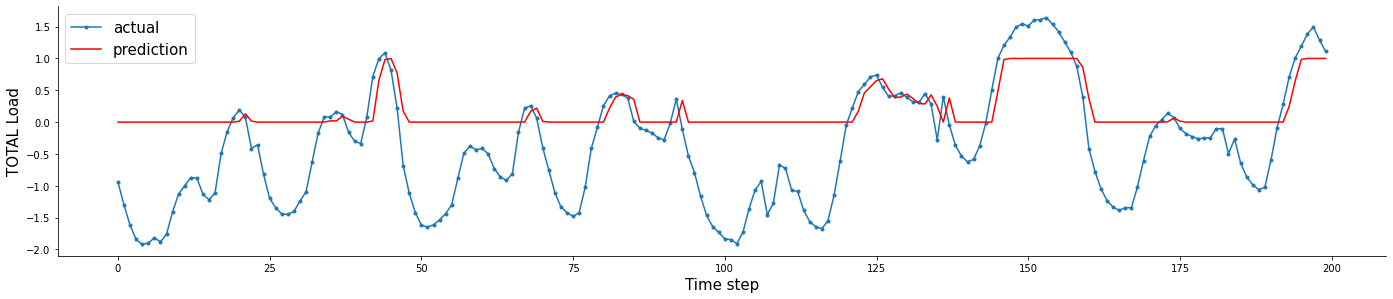

Epoch 1/50
351/351 [==============================] - 7s 10ms/step - loss: 1.0466 - val_loss: 0.9933
Epoch 2/50
351/351 [==============================] - 3s 8ms/step - loss: 0.9029 - val_loss: 0.6582
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6384 - val_loss: 0.5997
Epoch 4/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6144 - val_loss: 0.5961
Epoch 5/50
351/351 [==============================] - 4s 10ms/step - loss: 0.6094 - val_loss: 0.5946
Epoch 6/50
351/351 [==============================] - 3s 10ms/step - loss: 0.6048 - val_loss: 0.5932
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.6028 - val_loss: 0.5917
Epoch 8/50
351/351 [==============================] - 4s 11ms/step - loss: 0.6016 - val_loss: 0.5909
Epoch 9/50
351/351 [==============================] - 3s 10ms/step - loss: 0.5988 - val_loss: 0.5900
Epoch 10/50
351/351 [==============================] - 3s 8ms/step - loss: 0.5977 - val_loss: 

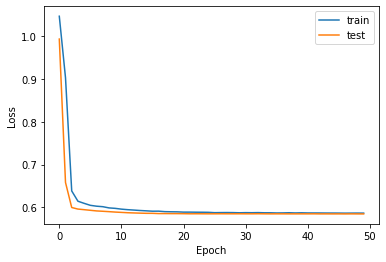

==============minmax===================
MAPE test is : 2.1932499115775297
MAPE test invert is : 0.10587611569949518
==============zscore===================
MAPE test is : 54198.071704945076
MAPE test invert is : 0.09084593586187165
RMSE Testing is : 0.765
RMSE Testing invert is : 3498.320
R2 test is : 0.41500720548979086
R2 test invert is : 0.41500720548979086


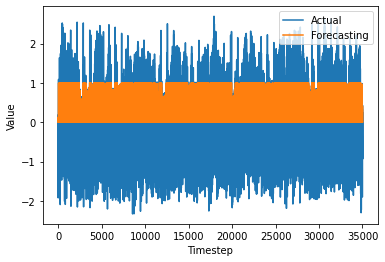

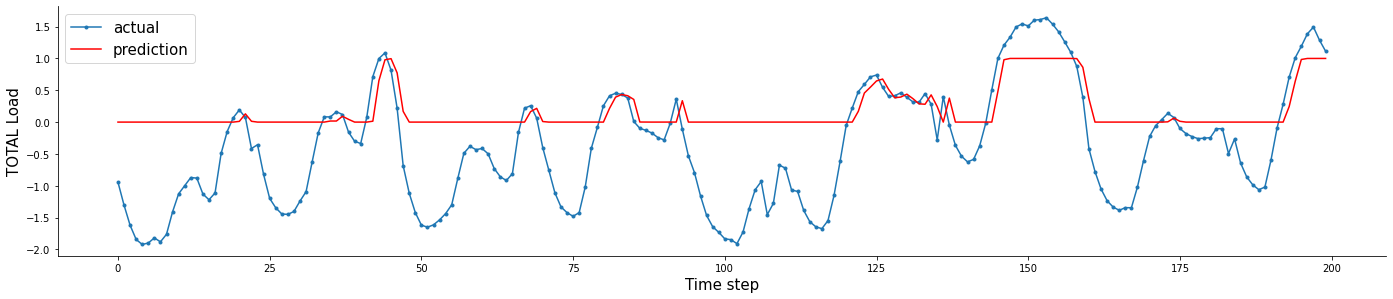

In [21]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='adam')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

# 5 run random

## tanh zscore

Epoch 1/91
351/351 [==============================] - 18s 23ms/step - loss: 0.6049 - val_loss: 0.6054
Epoch 2/91
351/351 [==============================] - 6s 16ms/step - loss: 0.5963 - val_loss: 0.6069
Epoch 3/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5960 - val_loss: 0.6076
Epoch 4/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5950 - val_loss: 0.6093
Epoch 5/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5950 - val_loss: 0.6124
Epoch 6/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5954 - val_loss: 0.6063
Epoch 7/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5940 - val_loss: 0.6120
Epoch 8/91
351/351 [==============================] - 6s 16ms/step - loss: 0.5945 - val_loss: 0.6118
Epoch 9/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5939 - val_loss: 0.6090
Epoch 10/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5941 - val_l

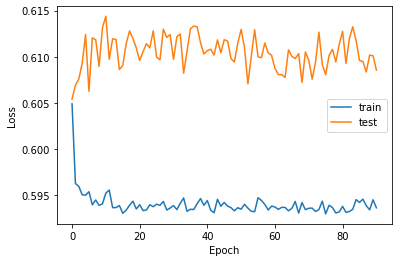

==============minmax===================
MAPE test is : 1.8118438935617918
MAPE test invert is : 0.10924490291839854
==============zscore===================
MAPE test is : 115487.5031232737
MAPE test invert is : 0.09409428691927114
RMSE Testing is : 0.774
RMSE Testing invert is : 3540.603
R2 test is : 0.400780399969915
R2 test invert is : 0.400780399969915


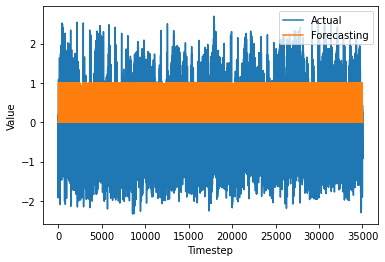

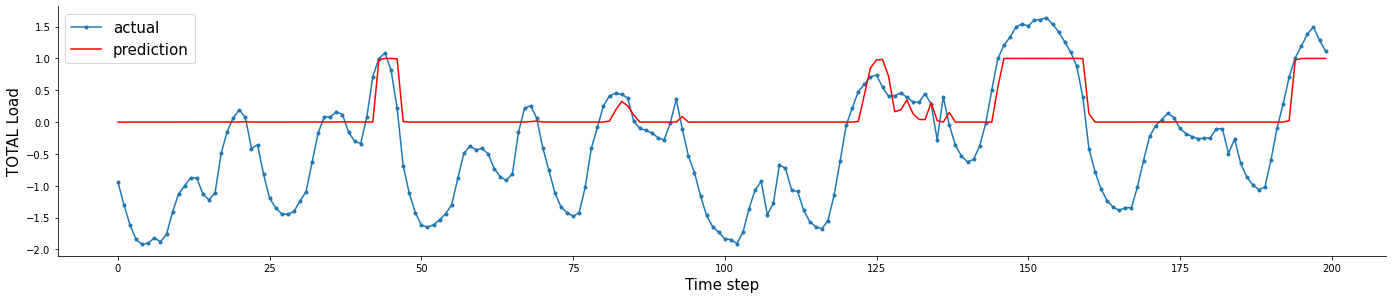

Epoch 1/91
351/351 [==============================] - 15s 21ms/step - loss: 0.6052 - val_loss: 0.6013
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5967 - val_loss: 0.6035
Epoch 3/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5957 - val_loss: 0.6110
Epoch 4/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5950 - val_loss: 0.6127
Epoch 5/91
351/351 [==============================] - 6s 16ms/step - loss: 0.5948 - val_loss: 0.6081
Epoch 6/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5942 - val_loss: 0.6109
Epoch 7/91
351/351 [==============================] - 6s 16ms/step - loss: 0.5947 - val_loss: 0.6125
Epoch 8/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5959 - val_loss: 0.6100
Epoch 9/91
351/351 [==============================] - 6s 16ms/step - loss: 0.5940 - val_loss: 0.6118
Epoch 10/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5943 - val_l

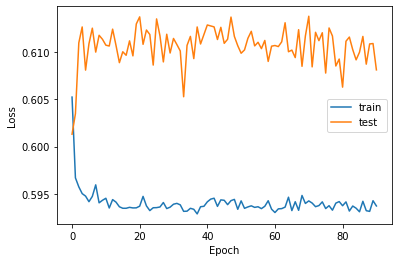

==============minmax===================
MAPE test is : 1.7783423814359163
MAPE test invert is : 0.10917374706586017
==============zscore===================
MAPE test is : 145538.2080295798
MAPE test invert is : 0.09404430422761814
RMSE Testing is : 0.774
RMSE Testing invert is : 3539.515
R2 test is : 0.40114862104557647
R2 test invert is : 0.4011486210455766


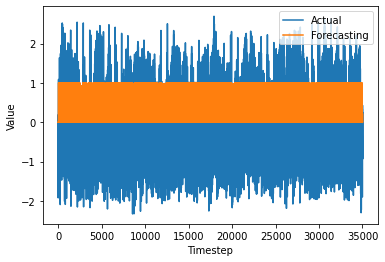

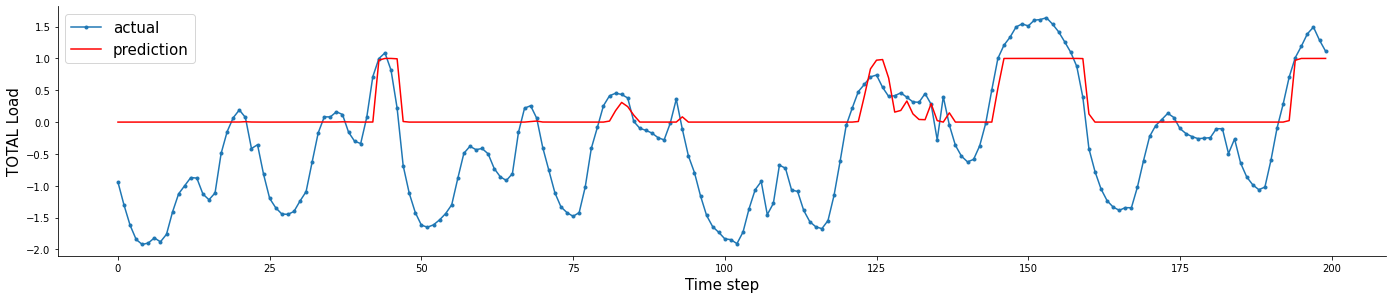

Epoch 1/91
351/351 [==============================] - 17s 28ms/step - loss: 0.6055 - val_loss: 0.6003
Epoch 2/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5969 - val_loss: 0.6056
Epoch 3/91
351/351 [==============================] - 8s 21ms/step - loss: 0.5957 - val_loss: 0.6066
Epoch 4/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5952 - val_loss: 0.6083
Epoch 5/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5944 - val_loss: 0.6104
Epoch 6/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5944 - val_loss: 0.6082
Epoch 7/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5940 - val_loss: 0.6120
Epoch 8/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5941 - val_loss: 0.6111
Epoch 9/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5943 - val_loss: 0.6102
Epoch 10/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5937 - val_l

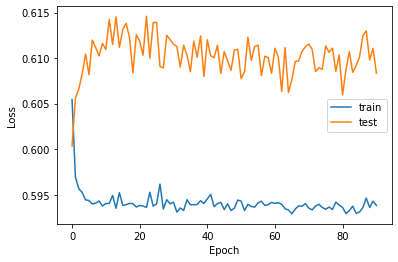

==============minmax===================
MAPE test is : 1.6383779413690094
MAPE test invert is : 0.10919013685433089
==============zscore===================
MAPE test is : 146269.44492051113
MAPE test invert is : 0.09413110780668021
RMSE Testing is : 0.774
RMSE Testing invert is : 3539.704
R2 test is : 0.40108481672273844
R2 test invert is : 0.40108481672273844


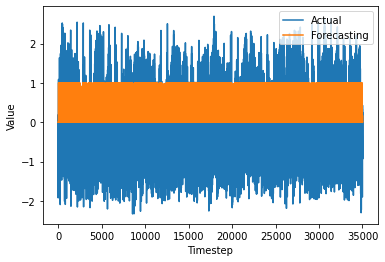

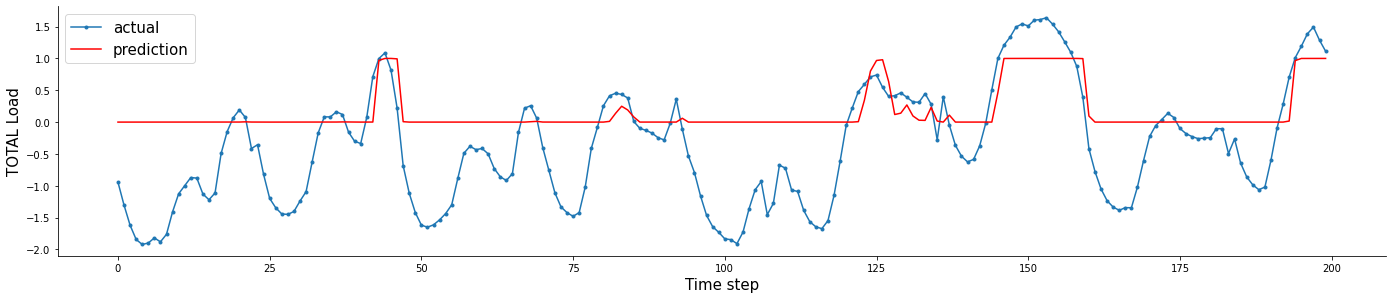

Epoch 1/91
351/351 [==============================] - 16s 24ms/step - loss: 0.6053 - val_loss: 0.6028
Epoch 2/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5965 - val_loss: 0.6052
Epoch 3/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5964 - val_loss: 0.6069
Epoch 4/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5950 - val_loss: 0.6069
Epoch 5/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5935 - val_loss: 0.6074
Epoch 6/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5946 - val_loss: 0.6105
Epoch 7/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5939 - val_loss: 0.6126
Epoch 8/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5947 - val_loss: 0.6112
Epoch 9/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5945 - val_loss: 0.6079
Epoch 10/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5941 - val_l

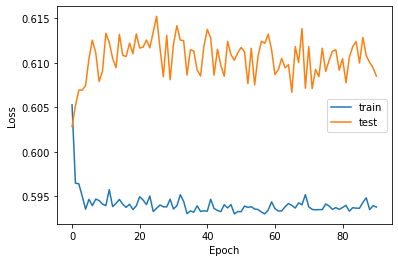

==============minmax===================
MAPE test is : 1.5521921763721054
MAPE test invert is : 0.10920343989342708
==============zscore===================
MAPE test is : 137861.38173634314
MAPE test invert is : 0.09419447044907746
RMSE Testing is : 0.774
RMSE Testing invert is : 3539.919
R2 test is : 0.40101200475971854
R2 test invert is : 0.40101200475971843


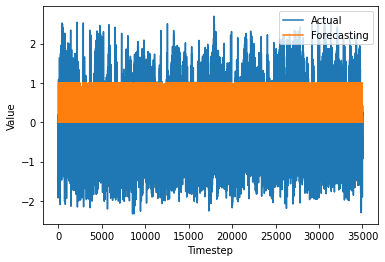

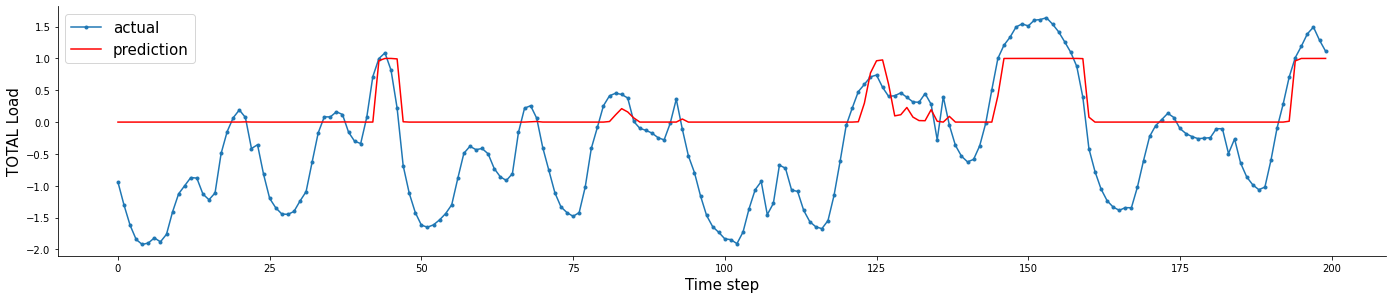

Epoch 1/91
351/351 [==============================] - 17s 22ms/step - loss: 0.6057 - val_loss: 0.5975
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5969 - val_loss: 0.6017
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5955 - val_loss: 0.6089
Epoch 4/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5946 - val_loss: 0.6102
Epoch 5/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5944 - val_loss: 0.6105
Epoch 6/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5941 - val_loss: 0.6093
Epoch 7/91
351/351 [==============================] - 7s 21ms/step - loss: 0.5941 - val_loss: 0.6095
Epoch 8/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5943 - val_loss: 0.6092
Epoch 9/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5939 - val_loss: 0.6093
Epoch 10/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5941 - val_l

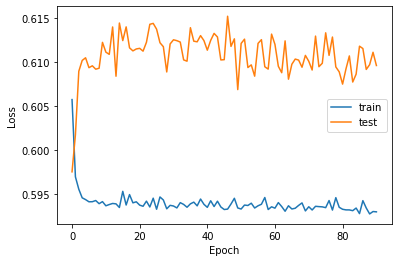

==============minmax===================
MAPE test is : 1.8523623657138748
MAPE test invert is : 0.10940247920389043
==============zscore===================
MAPE test is : 209529.0674590379
MAPE test invert is : 0.09422146568139646
RMSE Testing is : 0.774
RMSE Testing invert is : 3543.010
R2 test is : 0.3999654175815023
R2 test invert is : 0.3999654175815025


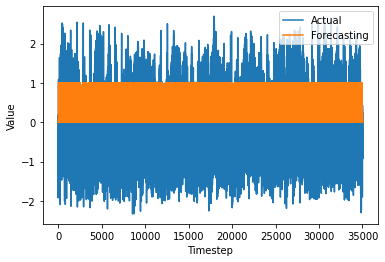

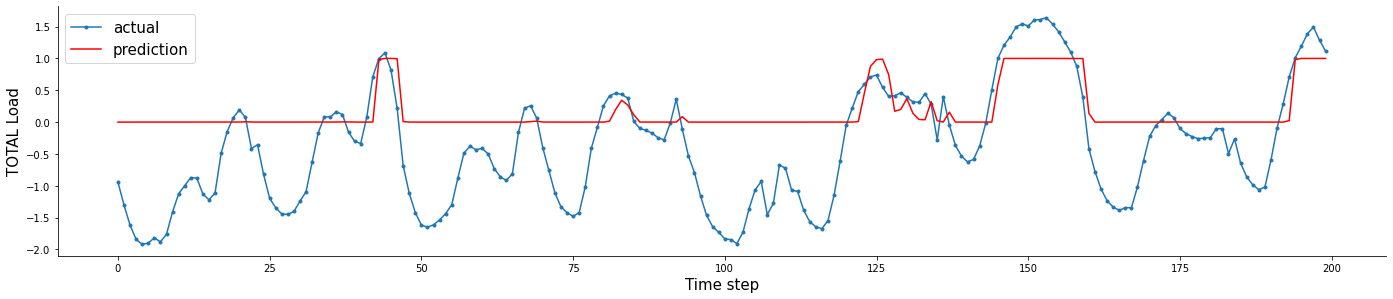

In [22]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(93, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

## tanh minmax

Epoch 1/91
351/351 [==============================] - 20s 27ms/step - loss: 0.0702 - val_loss: 0.0545
Epoch 2/91
351/351 [==============================] - 6s 18ms/step - loss: 0.0580 - val_loss: 0.0542
Epoch 3/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0564 - val_loss: 0.0598
Epoch 4/91
351/351 [==============================] - 6s 18ms/step - loss: 0.0562 - val_loss: 0.0514
Epoch 5/91
351/351 [==============================] - 8s 21ms/step - loss: 0.0558 - val_loss: 0.0533
Epoch 6/91
351/351 [==============================] - 8s 21ms/step - loss: 0.0559 - val_loss: 0.0545
Epoch 7/91
351/351 [==============================] - 6s 17ms/step - loss: 0.0555 - val_loss: 0.0540
Epoch 8/91
351/351 [==============================] - 7s 21ms/step - loss: 0.0550 - val_loss: 0.0509
Epoch 9/91
351/351 [==============================] - 6s 17ms/step - loss: 0.0554 - val_loss: 0.0540
Epoch 10/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0556 - val_l

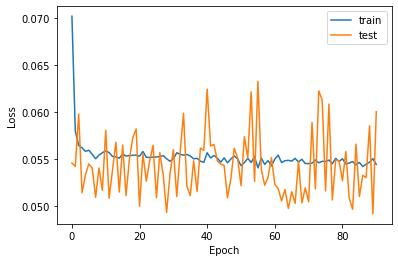

==============minmax===================
MAPE test is : 11811899114.78622
MAPE test invert is : 0.04892
==============zscore===================
MAPE test is : 0.19749
MAPE test invert is : 0.05188
RMSE Testing is : 0.081
RMSE Testing invert is : 1851.643
R2 test is : 0.83611


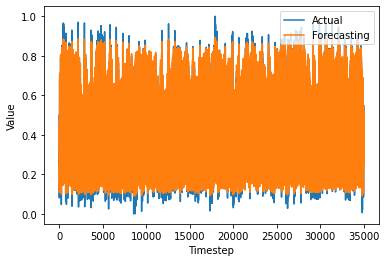

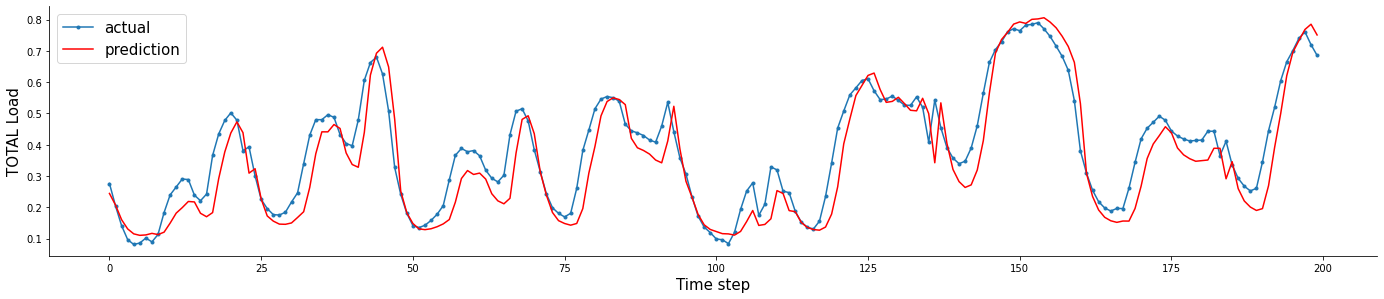

Epoch 1/91
351/351 [==============================] - 17s 26ms/step - loss: 0.0703 - val_loss: 0.0570
Epoch 2/91
351/351 [==============================] - 6s 18ms/step - loss: 0.0585 - val_loss: 0.0557
Epoch 3/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0566 - val_loss: 0.0506
Epoch 4/91
351/351 [==============================] - 6s 18ms/step - loss: 0.0562 - val_loss: 0.0501
Epoch 5/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0561 - val_loss: 0.0547
Epoch 6/91
351/351 [==============================] - 8s 23ms/step - loss: 0.0555 - val_loss: 0.0522
Epoch 7/91
351/351 [==============================] - 7s 20ms/step - loss: 0.0559 - val_loss: 0.0542
Epoch 8/91
351/351 [==============================] - 8s 23ms/step - loss: 0.0558 - val_loss: 0.0531
Epoch 9/91
351/351 [==============================] - 6s 18ms/step - loss: 0.0558 - val_loss: 0.0569
Epoch 10/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0553 - val_l

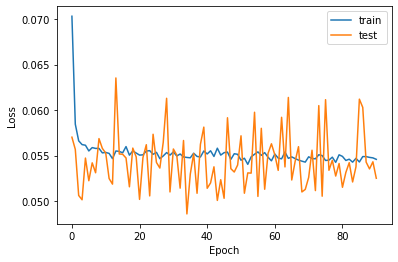

==============minmax===================
MAPE test is : 14096664052.10827
MAPE test invert is : 0.04242
==============zscore===================
MAPE test is : 0.15797
MAPE test invert is : 0.04478
RMSE Testing is : 0.072
RMSE Testing invert is : 1658.791
R2 test is : 0.86847


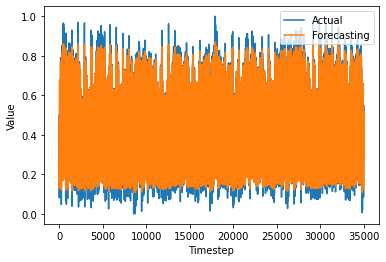

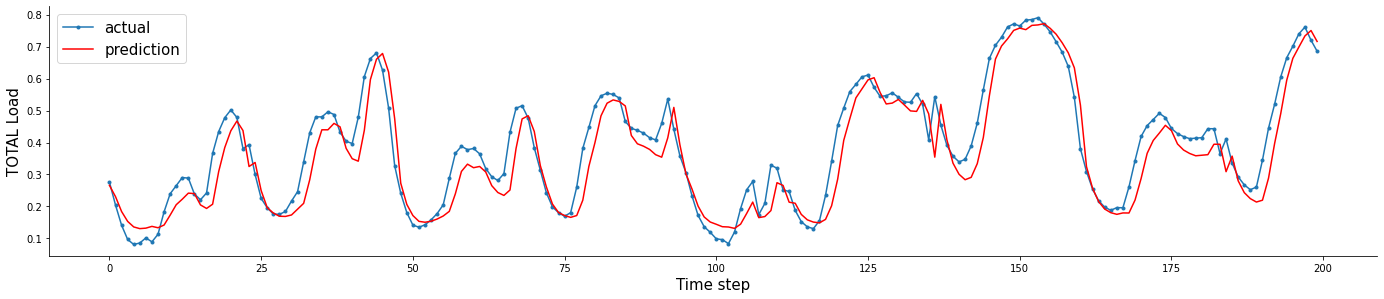

Epoch 1/91
351/351 [==============================] - 17s 25ms/step - loss: 0.0707 - val_loss: 0.0573
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0581 - val_loss: 0.0518
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.0567 - val_loss: 0.0530
Epoch 4/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0565 - val_loss: 0.0521
Epoch 5/91
351/351 [==============================] - 7s 21ms/step - loss: 0.0560 - val_loss: 0.0543
Epoch 6/91
351/351 [==============================] - 8s 21ms/step - loss: 0.0559 - val_loss: 0.0511
Epoch 7/91
351/351 [==============================] - 8s 23ms/step - loss: 0.0553 - val_loss: 0.0604
Epoch 8/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0558 - val_loss: 0.0589
Epoch 9/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0553 - val_loss: 0.0583
Epoch 10/91
351/351 [==============================] - 9s 27ms/step - loss: 0.0558 - val_l

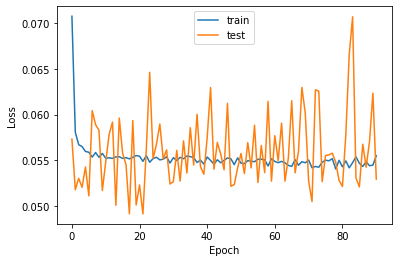

==============minmax===================
MAPE test is : 14067094358.68473
MAPE test invert is : 0.04286
==============zscore===================
MAPE test is : 0.16087
MAPE test invert is : 0.04523
RMSE Testing is : 0.073
RMSE Testing invert is : 1674.227
R2 test is : 0.86601


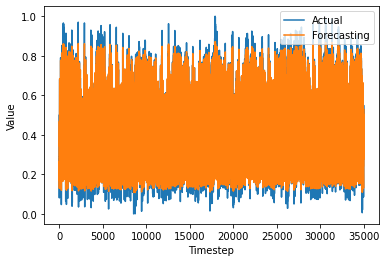

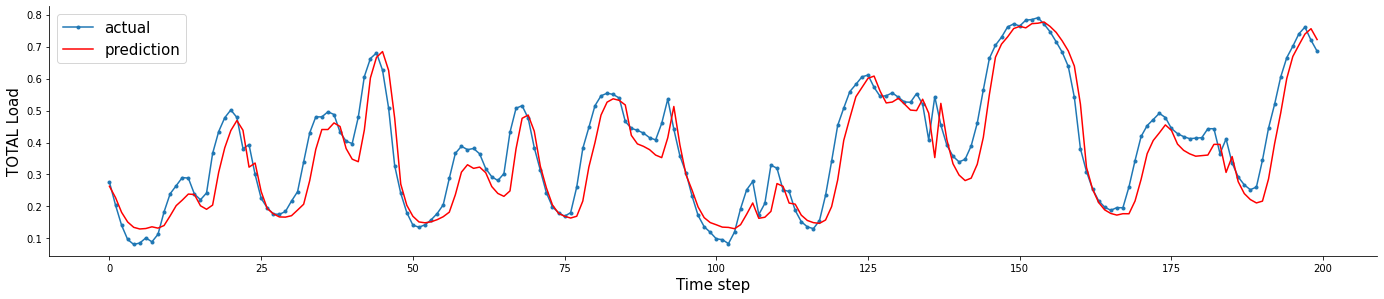

Epoch 1/91
351/351 [==============================] - 26s 31ms/step - loss: 0.0710 - val_loss: 0.0604
Epoch 2/91
351/351 [==============================] - 9s 25ms/step - loss: 0.0583 - val_loss: 0.0564
Epoch 3/91
351/351 [==============================] - 9s 24ms/step - loss: 0.0569 - val_loss: 0.0552
Epoch 4/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0563 - val_loss: 0.0573
Epoch 5/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0564 - val_loss: 0.0552
Epoch 6/91
351/351 [==============================] - 10s 28ms/step - loss: 0.0563 - val_loss: 0.0546
Epoch 7/91
351/351 [==============================] - 9s 25ms/step - loss: 0.0558 - val_loss: 0.0555
Epoch 8/91
351/351 [==============================] - 8s 21ms/step - loss: 0.0557 - val_loss: 0.0540
Epoch 9/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0556 - val_loss: 0.0539
Epoch 10/91
351/351 [==============================] - 8s 24ms/step - loss: 0.0557 - val_

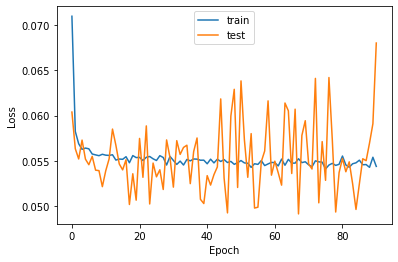

==============minmax===================
MAPE test is : 10622989047.94288
MAPE test invert is : 0.05581
==============zscore===================
MAPE test is : 0.24522
MAPE test invert is : 0.05991
RMSE Testing is : 0.089
RMSE Testing invert is : 2042.772
R2 test is : 0.80053


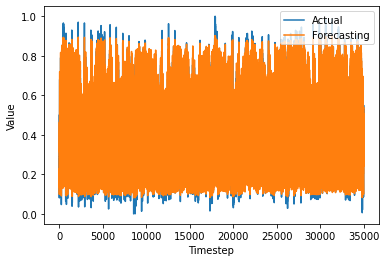

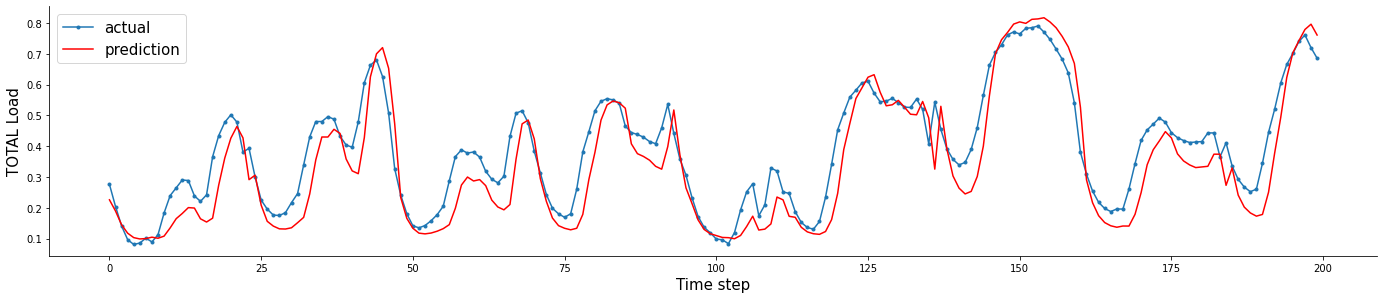

Epoch 1/91
351/351 [==============================] - 18s 29ms/step - loss: 0.0711 - val_loss: 0.0536
Epoch 2/91
351/351 [==============================] - 9s 26ms/step - loss: 0.0578 - val_loss: 0.0526
Epoch 3/91
351/351 [==============================] - 8s 21ms/step - loss: 0.0568 - val_loss: 0.0531
Epoch 4/91
351/351 [==============================] - 9s 25ms/step - loss: 0.0564 - val_loss: 0.0532
Epoch 5/91
351/351 [==============================] - 9s 24ms/step - loss: 0.0556 - val_loss: 0.0516
Epoch 6/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0561 - val_loss: 0.0517
Epoch 7/91
351/351 [==============================] - 9s 24ms/step - loss: 0.0561 - val_loss: 0.0592
Epoch 8/91
351/351 [==============================] - 10s 27ms/step - loss: 0.0562 - val_loss: 0.0596
Epoch 9/91
351/351 [==============================] - 8s 22ms/step - loss: 0.0560 - val_loss: 0.0535
Epoch 10/91
351/351 [==============================] - 9s 24ms/step - loss: 0.0555 - val_

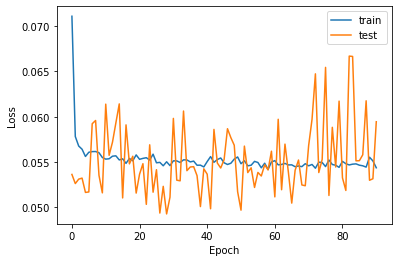

==============minmax===================
MAPE test is : 12325579557.61281
MAPE test invert is : 0.04840
==============zscore===================
MAPE test is : 0.19860
MAPE test invert is : 0.05202
RMSE Testing is : 0.081
RMSE Testing invert is : 1851.971
R2 test is : 0.83605


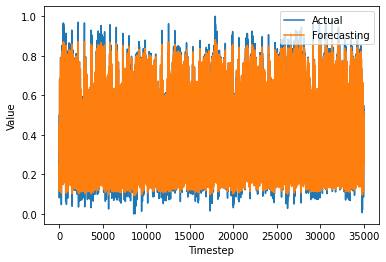

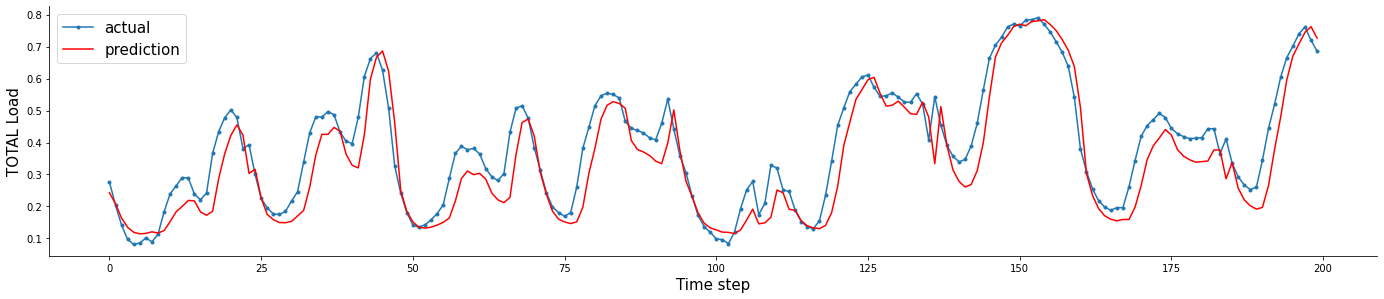

0                     1                     2  \
0   11811899114,786219    14096664052,108267    14067094358,684734   
1   0,0489200775099638   0,04242192524834773   0,04285615990362494   
2  0,19748999546152962   0,15796907290602452    0,1608685861391824   
3  0,05187551726083277  0,044781399846198125  0,045234279494127436   
4  0.08059734278324877   0.07220298566828941   0.07287487487866798   
5   1851,6433531023574     1658,791392743281    1674,2273754625182   
6   0,8361123651871802    0,8684729580133321    0,8660137030898987   
7                  268                   268                   268   
8              mminmax         minmax invert                zscore   

                      3                     4             5     6      7  
0     10622989047,94288     12325579557,61281          None  None   None  
1    0,0558052355942567  0,048399624069298736          None  None   None  
2   0,24522134909085877   0,19860130960962957          None  None   None  
3  0,059906205189598015   0,05201659245422948          None  None   None  
4    0.0889166941082788   0.08061161750453022          None  None   None  
5     2042,772130443597    1851,9713005490776          None  None   None  
6    0,8005328626595095     0,836054307256249          None  None   None  
7                   268                   268          None  None   None  
8         zscpre invert                  rmse   rmse invert    r2  waktu

In [50]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(93, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
datat.append(['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu'])
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)
  
# print dataframe.
dc

## sig minmax

Epoch 1/91
351/351 [==============================] - 20s 29ms/step - loss: 0.1810 - val_loss: 0.1698
Epoch 2/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1747 - val_loss: 0.1701
Epoch 3/91
351/351 [==============================] - 8s 24ms/step - loss: 0.1719 - val_loss: 0.1700
Epoch 4/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1707 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1703 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1698 - val_loss: 0.1698
Epoch 9/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 7s 20ms/step - loss: 0.1697 - val_l

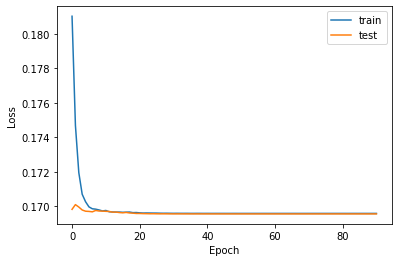

==============minmax===================
MAPE test is : 61055784417.74221
MAPE test invert is : 0.14248
==============zscore===================
MAPE test is : 0.35728
MAPE test invert is : 0.13458
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.614
R2 test is : -0.00295


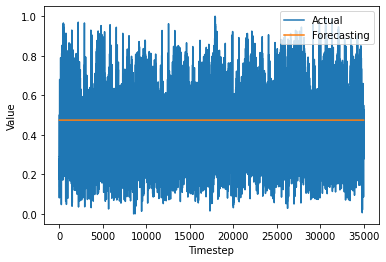

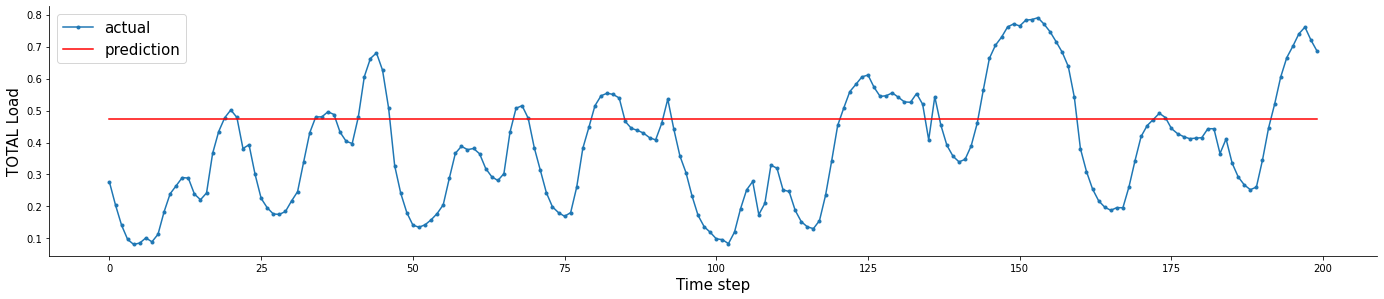

Epoch 1/91
351/351 [==============================] - 19s 27ms/step - loss: 0.1801 - val_loss: 0.1700
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1748 - val_loss: 0.1698
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.1723 - val_loss: 0.1700
Epoch 4/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1709 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 7s 19ms/step - loss: 0.1702 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 8s 21ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 7s 20ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 7s 19ms/step - loss: 0.1698 - val_l

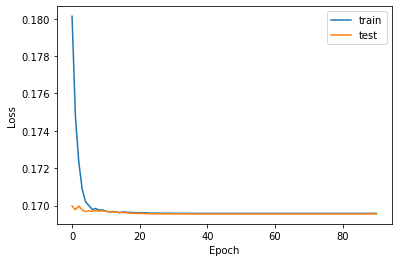

==============minmax===================
MAPE test is : 61057713042.71535
MAPE test invert is : 0.14248
==============zscore===================
MAPE test is : 0.35727
MAPE test invert is : 0.13458
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.633
R2 test is : -0.00296


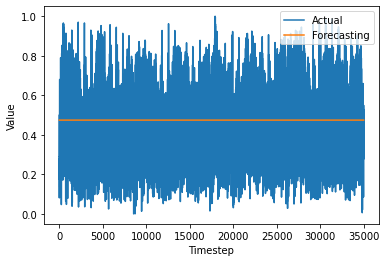

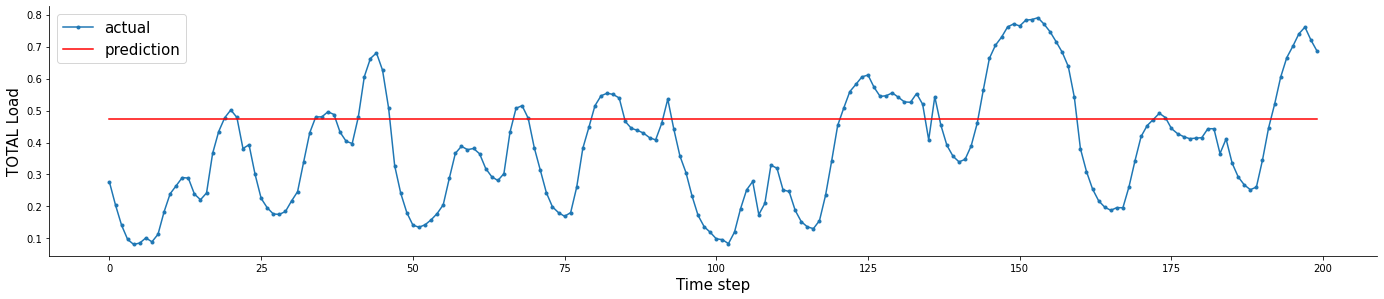

Epoch 1/91
351/351 [==============================] - 16s 24ms/step - loss: 0.1821 - val_loss: 0.1701
Epoch 2/91
351/351 [==============================] - 7s 19ms/step - loss: 0.1754 - val_loss: 0.1700
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.1725 - val_loss: 0.1701
Epoch 4/91
351/351 [==============================] - 7s 20ms/step - loss: 0.1708 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 6s 18ms/step - loss: 0.1703 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 6s 18ms/step - loss: 0.1699 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1697 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 6s 18ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1697 - val_l

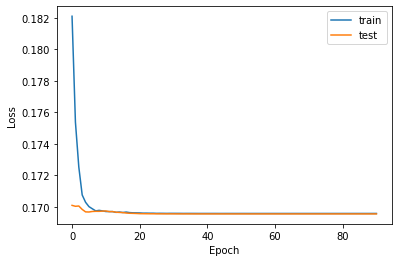

==============minmax===================
MAPE test is : 61055999135.43305
MAPE test invert is : 0.14248
==============zscore===================
MAPE test is : 0.35728
MAPE test invert is : 0.13458
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.616
R2 test is : -0.00295


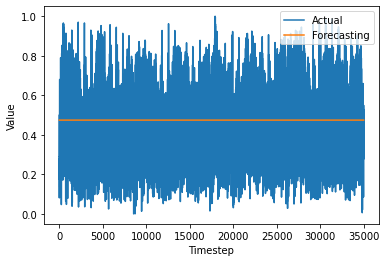

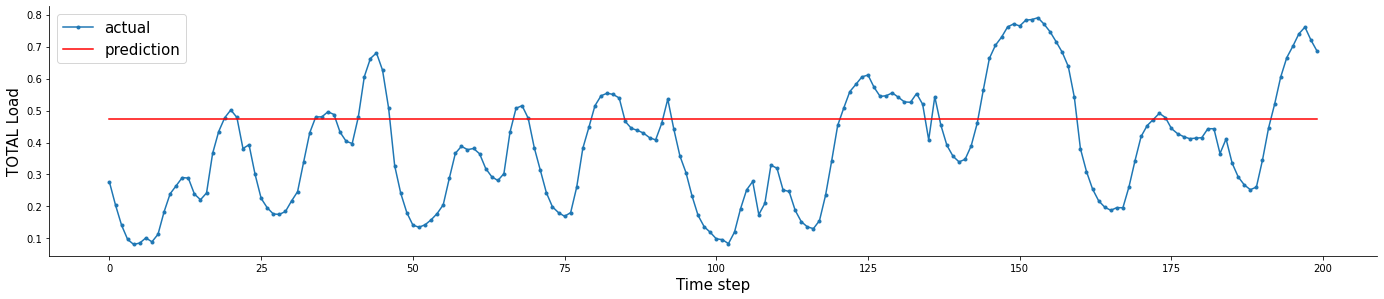

Epoch 1/91
351/351 [==============================] - 28s 33ms/step - loss: 0.1786 - val_loss: 0.1698
Epoch 2/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1741 - val_loss: 0.1700
Epoch 3/91
351/351 [==============================] - 9s 25ms/step - loss: 0.1720 - val_loss: 0.1699
Epoch 4/91
351/351 [==============================] - 9s 24ms/step - loss: 0.1709 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 9s 27ms/step - loss: 0.1702 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 9s 26ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 9s 25ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 8s 24ms/step - loss: 0.1697 - val_l

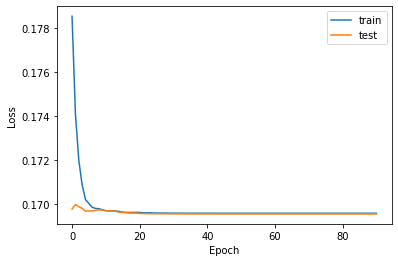

==============minmax===================
MAPE test is : 61056432405.05922
MAPE test invert is : 0.14248
==============zscore===================
MAPE test is : 0.35728
MAPE test invert is : 0.13458
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.620
R2 test is : -0.00295


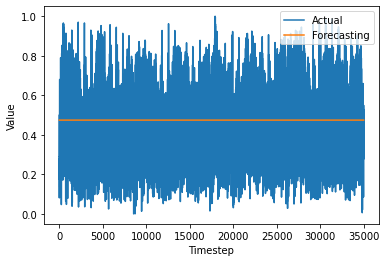

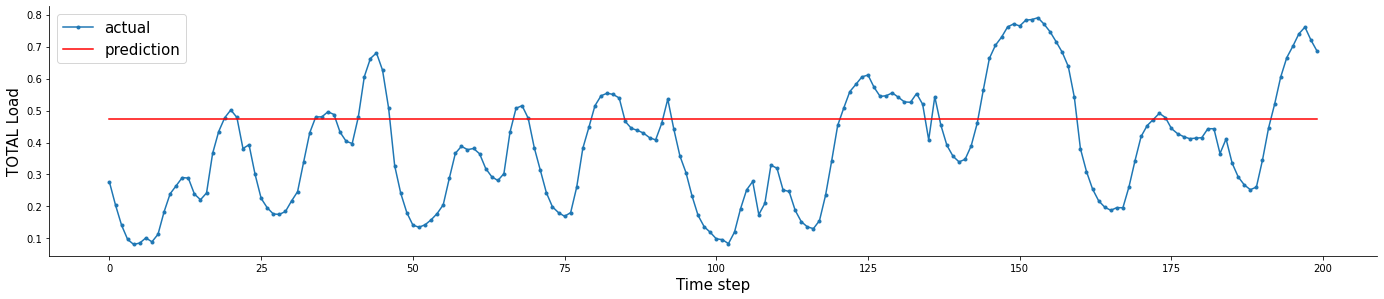

Epoch 1/91
351/351 [==============================] - 20s 29ms/step - loss: 0.1825 - val_loss: 0.1707
Epoch 2/91
351/351 [==============================] - 7s 21ms/step - loss: 0.1764 - val_loss: 0.1697
Epoch 3/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1727 - val_loss: 0.1699
Epoch 4/91
351/351 [==============================] - 9s 24ms/step - loss: 0.1711 - val_loss: 0.1698
Epoch 5/91
351/351 [==============================] - 8s 22ms/step - loss: 0.1702 - val_loss: 0.1697
Epoch 6/91
351/351 [==============================] - 8s 23ms/step - loss: 0.1700 - val_loss: 0.1697
Epoch 7/91
351/351 [==============================] - 10s 28ms/step - loss: 0.1698 - val_loss: 0.1697
Epoch 8/91
351/351 [==============================] - 8s 24ms/step - loss: 0.1697 - val_loss: 0.1697
Epoch 9/91
351/351 [==============================] - 13s 38ms/step - loss: 0.1697 - val_loss: 0.1697
Epoch 10/91
351/351 [==============================] - 13s 36ms/step - loss: 0.1697 - va

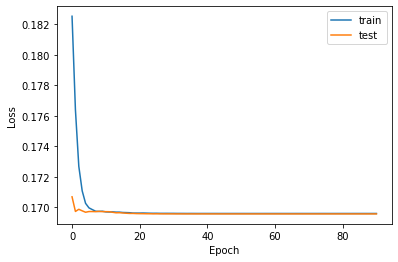

==============minmax===================
MAPE test is : 61057532833.22481
MAPE test invert is : 0.14248
==============zscore===================
MAPE test is : 0.35727
MAPE test invert is : 0.13458
RMSE Testing is : 0.199
RMSE Testing invert is : 4580.631
R2 test is : -0.00296


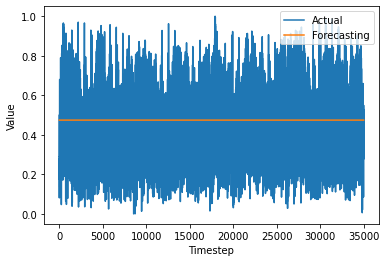

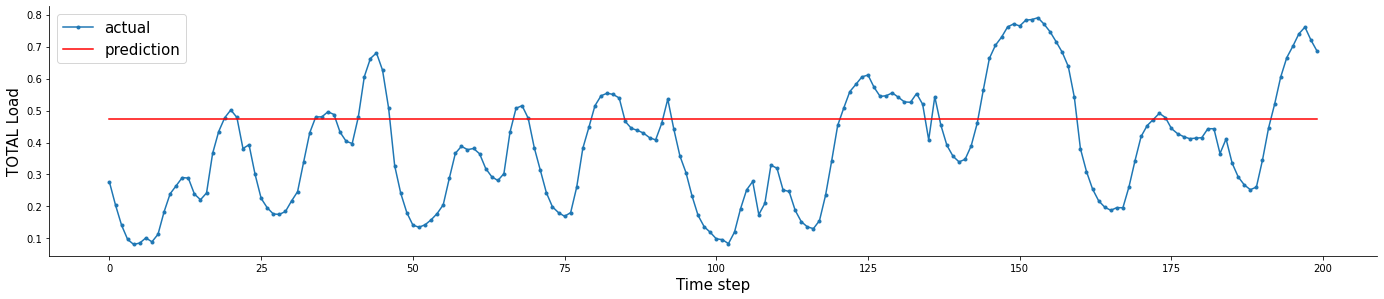

0                       1                      2  \
0       61055784417,74221       61057713042,71535      61055999135,43305   
1     0,14247766860560102     0,14247942625736437     0,1424778642725498   
2      0,3572815705550953      0,3572704506426549    0,35728033247581636   
3     0,13458306902797493     0,13458153002582193    0,13458289767001178   
4      0.1993825144655373     0.19938332789680255    0.19938260497088325   
5       4580,613887331254       4580,632575101142      4580,615966601071   
6  -0,0029490642337319795  -0,0029572478178609973  -0,002949974767666008   
7                     268                     268                    268   
8                 mminmax           minmax invert                 zscore   

                        3                       4             5     6      7  
0       61056432405,05922       61057532833,22481          None  None   None  
1     0,14247825910050008      0,1424792619108038          None  None   None  
2      0,3572778342352137      0,3572714893487063          None  None   None  
3     0,13458255189550422     0,13458167371441485          None  None   None  
4     0.19938278764015205     0.19938325184382347          None  None   None  
5       4580,620163244853           4580,63082786          None  None   None  
6  -0,0029518125229954784  -0,0029564826799446386          None  None   None  
7                     268                     268          None  None   None  
8           zscpre invert                    rmse   rmse invert    r2  waktu

In [51]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil

mapem = []
mapemi = []
mapez = []
mapezi = []
r = []
ri = []
r2 = []
w = []

datat = []

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(93, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  mapemin = (mape(test_y, yhat))
  print(f'MAPE test is : %.5f' % mapemin)
  mapemini = (mape(inv_y, inv_yhat))
  print(f'MAPE test invert is : %.5f' % mapemini)

  print('==============zscore===================')
  mapezs = (mape(yhat, test_y))
  print(f'MAPE test is : %.5f' % mapezs)
  mapezsi = (mape(inv_yhat, inv_y))
  print(f'MAPE test invert is : %.5f' % mapezsi)

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  rs = r2_score(test_y, yhat)
  print(f'R2 test is : %.5f' % rs)
  # print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

  mapem.append(str(mapemin).replace('.', ','))
  mapemi.append(str(mapemini).replace('.', ','))
  mapez.append(str(mapezs).replace('.', ','))
  mapezi.append(str(mapezsi).replace('.', ','))
  r.append(str(rmsetest))
  ri.append(str(rmsetestinvert).replace('.', ','))
  r2.append(str(rs).replace('.', ','))
  w.append(str(round(waktu)))



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")

datat.append(mapem)
datat.append(mapemi)
datat.append(mapez)
datat.append(mapezi)
datat.append(r)
datat.append(ri)
datat.append(r2)
datat.append(w)
datat.append(['mminmax', 'minmax invert', 'zscore', 'zscpre invert', 'rmse', ' rmse invert', 'r2', 'waktu'])
  
# Create the pandas DataFrame
dc = pd.DataFrame(datat)
  
# print dataframe.
dc

## sig zscore

Epoch 1/91
351/351 [==============================] - 20s 31ms/step - loss: 0.8527 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 7s 21ms/step - loss: 0.8519 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 9s 24ms/step - loss: 0.8172 - val_loss: 0.6307
Epoch 4/91
351/351 [==============================] - 8s 23ms/step - loss: 0.6338 - val_loss: 0.6009
Epoch 5/91
351/351 [==============================] - 8s 22ms/step - loss: 0.6117 - val_loss: 0.5893
Epoch 6/91
351/351 [==============================] - 9s 25ms/step - loss: 0.6047 - val_loss: 0.5915
Epoch 7/91
351/351 [==============================] - 9s 26ms/step - loss: 0.6014 - val_loss: 0.5897
Epoch 8/91
351/351 [==============================] - 9s 25ms/step - loss: 0.5992 - val_loss: 0.5893
Epoch 9/91
351/351 [==============================] - 10s 27ms/step - loss: 0.5971 - val_loss: 0.5890
Epoch 10/91
351/351 [==============================] - 8s 23ms/step - loss: 0.5969 - val_

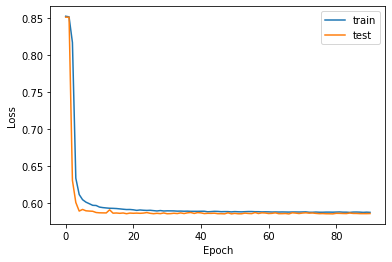

==============minmax===================
MAPE test is : 2.19884212882642
MAPE test invert is : 0.10589881203033809
==============zscore===================
MAPE test is : 2253489.785258228
MAPE test invert is : 0.09083093005961325
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.047
R2 test is : 0.41476379927841467
R2 test invert is : 0.4147637992784149


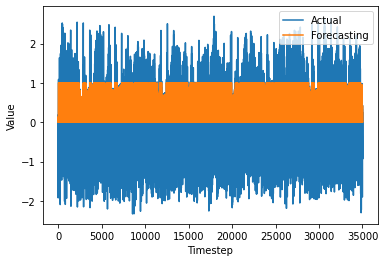

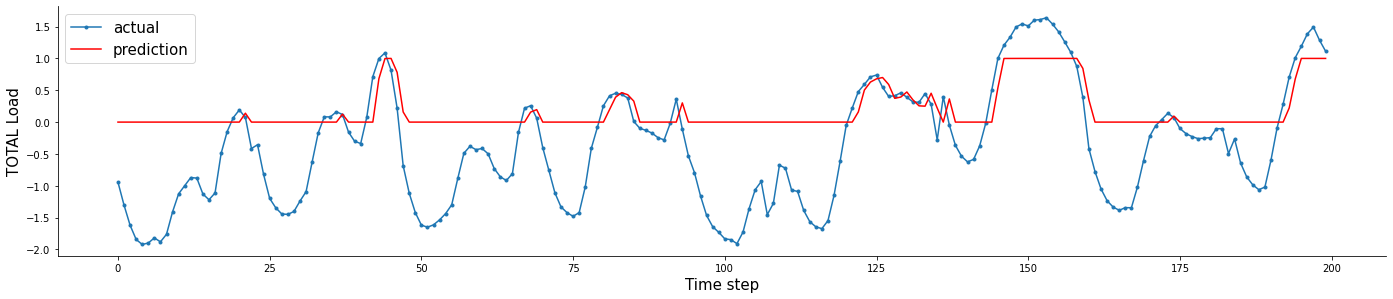

Epoch 1/91
351/351 [==============================] - 16s 24ms/step - loss: 0.8532 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 6s 17ms/step - loss: 0.8518 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 7s 21ms/step - loss: 0.7179 - val_loss: 0.6269
Epoch 4/91
351/351 [==============================] - 6s 17ms/step - loss: 0.6224 - val_loss: 0.5946
Epoch 5/91
351/351 [==============================] - 7s 21ms/step - loss: 0.6068 - val_loss: 0.5915
Epoch 6/91
351/351 [==============================] - 6s 17ms/step - loss: 0.6022 - val_loss: 0.5891
Epoch 7/91
351/351 [==============================] - 7s 20ms/step - loss: 0.6006 - val_loss: 0.5893
Epoch 8/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5982 - val_loss: 0.5876
Epoch 9/91
351/351 [==============================] - 7s 20ms/step - loss: 0.5969 - val_loss: 0.5880
Epoch 10/91
351/351 [==============================] - 6s 17ms/step - loss: 0.5957 - val_l

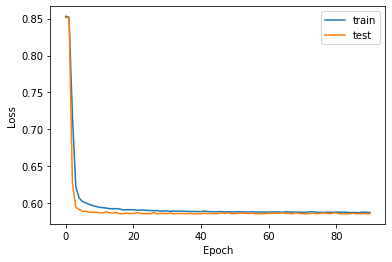

==============minmax===================
MAPE test is : 2.427155959414333
MAPE test invert is : 0.10592184044452051
==============zscore===================
MAPE test is : 3393876.2051285636
MAPE test invert is : 0.09080572804071692
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.165
R2 test is : 0.4147245119830928
R2 test invert is : 0.4147245119830927


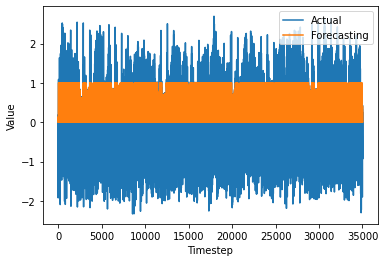

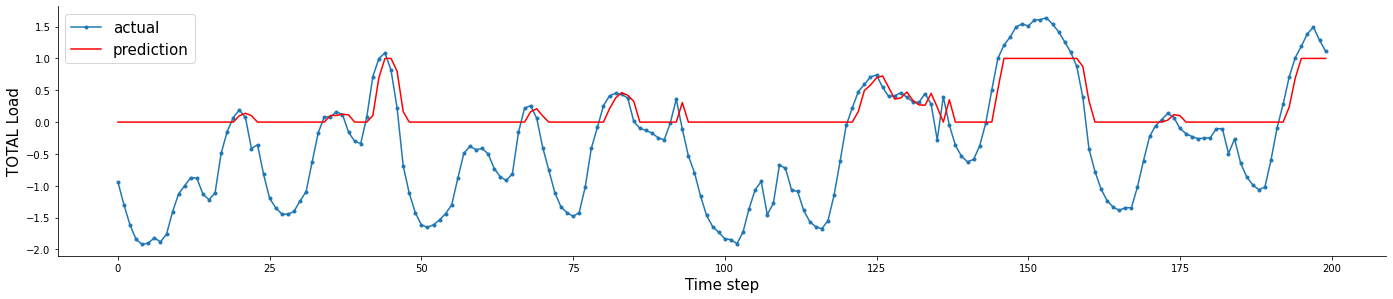

Epoch 1/91
351/351 [==============================] - 18s 24ms/step - loss: 0.8530 - val_loss: 0.8514
Epoch 2/91
351/351 [==============================] - 6s 18ms/step - loss: 0.8517 - val_loss: 0.8510
Epoch 3/91
351/351 [==============================] - 7s 21ms/step - loss: 0.6645 - val_loss: 0.6221
Epoch 4/91
351/351 [==============================] - 6s 18ms/step - loss: 0.6156 - val_loss: 0.5913
Epoch 5/91
351/351 [==============================] - 8s 22ms/step - loss: 0.6061 - val_loss: 0.5918
Epoch 6/91
351/351 [==============================] - 6s 18ms/step - loss: 0.6018 - val_loss: 0.5897
Epoch 7/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5997 - val_loss: 0.5894
Epoch 8/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5975 - val_loss: 0.5877
Epoch 9/91
351/351 [==============================] - 8s 21ms/step - loss: 0.5963 - val_loss: 0.5874
Epoch 10/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5960 - val_l

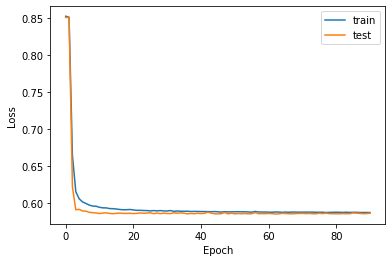

==============minmax===================
MAPE test is : 2.1658853047536106
MAPE test invert is : 0.10602556946946678
==============zscore===================
MAPE test is : 1233829.6067467798
MAPE test invert is : 0.09089135894083555
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.514
R2 test is : 0.41427313576137537
R2 test invert is : 0.41427313576137514


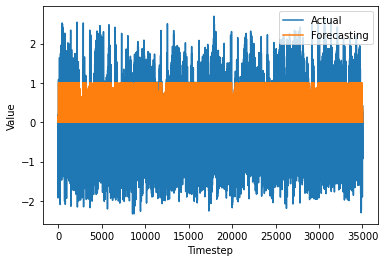

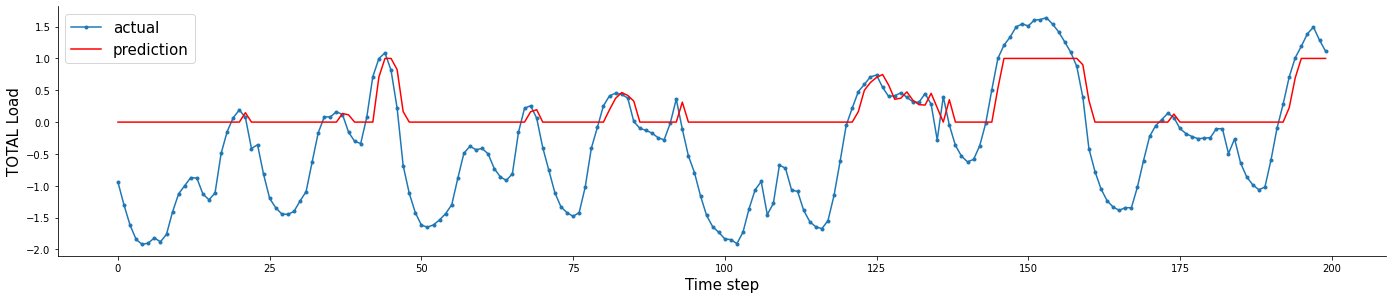

Epoch 1/91
351/351 [==============================] - 18s 32ms/step - loss: 0.8525 - val_loss: 0.8515
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.8519 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.7565 - val_loss: 0.6311
Epoch 4/91
351/351 [==============================] - 8s 22ms/step - loss: 0.6220 - val_loss: 0.5973
Epoch 5/91
351/351 [==============================] - 7s 19ms/step - loss: 0.6046 - val_loss: 0.5902
Epoch 6/91
351/351 [==============================] - 8s 23ms/step - loss: 0.6017 - val_loss: 0.5881
Epoch 7/91
351/351 [==============================] - 7s 19ms/step - loss: 0.6004 - val_loss: 0.5872
Epoch 8/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5978 - val_loss: 0.5888
Epoch 9/91
351/351 [==============================] - 8s 23ms/step - loss: 0.5969 - val_loss: 0.5887
Epoch 10/91
351/351 [==============================] - 7s 19ms/step - loss: 0.5961 - val_l

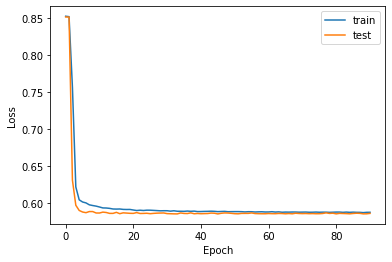

==============minmax===================
MAPE test is : 2.3877630055200907
MAPE test invert is : 0.10597456898063222
==============zscore===================
MAPE test is : 1516017.7619114714
MAPE test invert is : 0.09083209558920491
RMSE Testing is : 0.765
RMSE Testing invert is : 3499.999
R2 test is : 0.41444531734014645
R2 test invert is : 0.41444531734014645


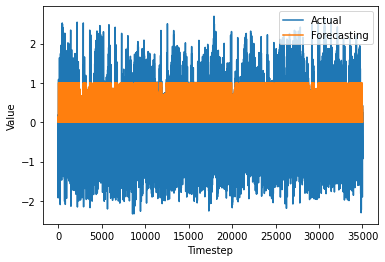

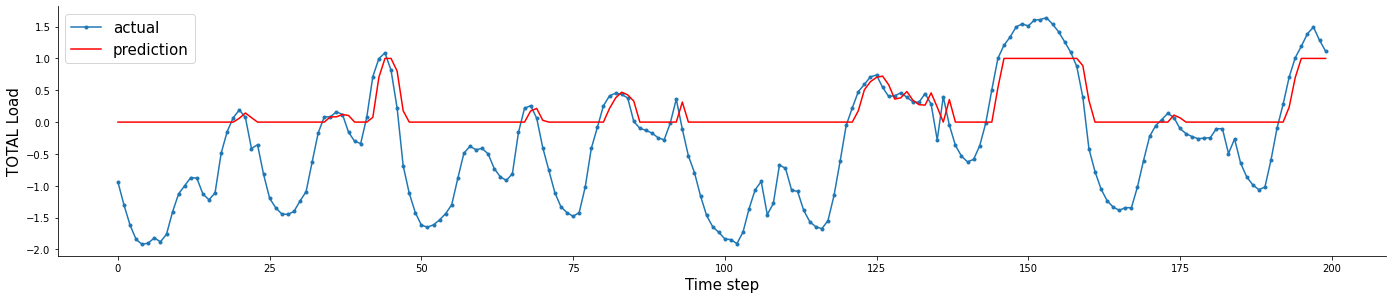

Epoch 1/91
351/351 [==============================] - 17s 27ms/step - loss: 0.8525 - val_loss: 0.8515
Epoch 2/91
351/351 [==============================] - 8s 22ms/step - loss: 0.8518 - val_loss: 0.8514
Epoch 3/91
351/351 [==============================] - 7s 19ms/step - loss: 0.6949 - val_loss: 0.6184
Epoch 4/91
351/351 [==============================] - 8s 22ms/step - loss: 0.6121 - val_loss: 0.5922
Epoch 5/91
351/351 [==============================] - 6s 18ms/step - loss: 0.6047 - val_loss: 0.5949
Epoch 6/91
351/351 [==============================] - 8s 22ms/step - loss: 0.6028 - val_loss: 0.5960
Epoch 7/91
351/351 [==============================] - 6s 18ms/step - loss: 0.6003 - val_loss: 0.5872
Epoch 8/91
351/351 [==============================] - 8s 22ms/step - loss: 0.5975 - val_loss: 0.5894
Epoch 9/91
351/351 [==============================] - 6s 18ms/step - loss: 0.5963 - val_loss: 0.5879
Epoch 10/91
351/351 [==============================] - 8s 21ms/step - loss: 0.5955 - val_l

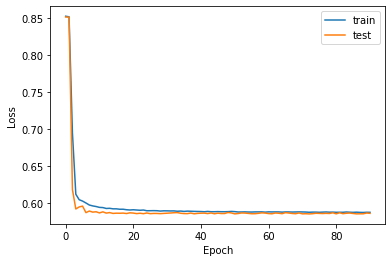

==============minmax===================
MAPE test is : 2.4512672287089106
MAPE test invert is : 0.10599290500765599
==============zscore===================
MAPE test is : 958788.6277032986
MAPE test invert is : 0.09082406918874204
RMSE Testing is : 0.765
RMSE Testing invert is : 3500.060
R2 test is : 0.41442490861813497
R2 test invert is : 0.4144249086181352


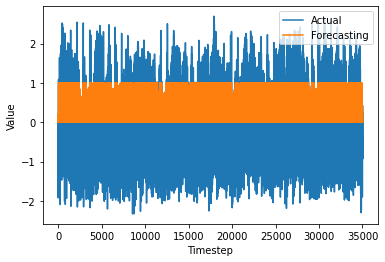

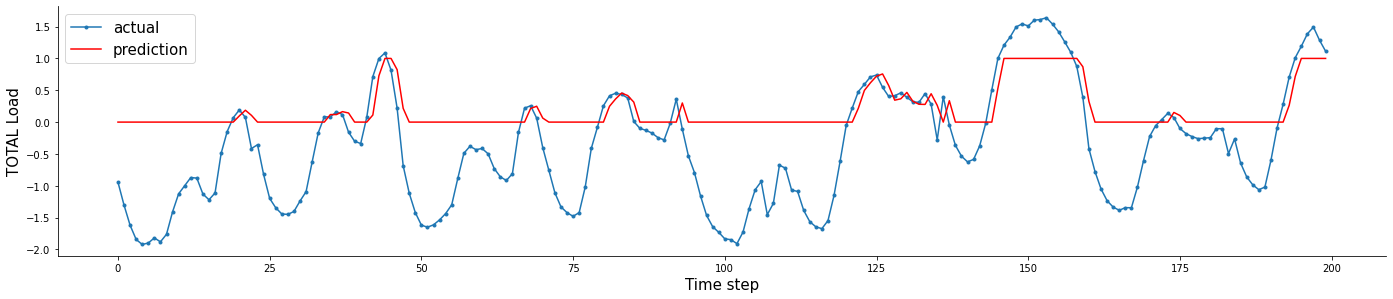

In [23]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(93, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 93, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='adam')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=91, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")